In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from torchvision.datasets import MNIST
from torchvision.transforms import transforms

from GAN.mnist_fully_connected import (
    Generator,
    Discriminator,
    GeneratorLoss,
    DiscriminatorLoss
)

In [2]:
if torch.cuda.is_available(): device = torch.device('cuda')
elif torch.backends.mps.is_available(): device = torch.device('mps')
else: device = torch.device('cpu')
print(f'Using device: {device}')

Using device: cuda


In [3]:
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

In [4]:
def save_plot(
        Generator: nn.Module,
        Z_noise: list[torch.Tensor],
        nrows: int,
        ncols: int,
        figsize: tuple[int, int],
        epoch: int
    ) -> None:
    if not os.path.isdir('./mnist_images'):
        os.makedirs('./mnist_images')

    fig, ax = plt.subplots(nrows, ncols, figsize=figsize)  
    ax = ax.flatten() 
    images = [Generator(z).reshape(28, 28).detach().cpu().numpy() for z in Z_noise]
    for i in range(nrows * ncols):
        ax[i].imshow(images[i], cmap='gray')
        ax[i].axis('off')
    plt.tight_layout() 
    plt.savefig(f'./mnist_images/{epoch}_mnist.png')
    plt.close(fig)

In [5]:
def load_mnist(root: str='./mnist/', batch_size: int=256) -> tuple[DataLoader, DataLoader]:
    """
    Loads MNIST dataset and returns it as a dataloader. 
    """ 
    transform = transforms.Compose(
        [transforms.ToTensor(),                     # greyscale [0, 255] -> [0, 1]
        transforms.Lambda(lambda x: x.view(-1))])   # shape [1, 28, 28] -> [1, 784]

    mnist_train = MNIST(
        root=root,
        train=True,
        download=True,
        transform=transform)
        
    dataloader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
    return dataloader

In [6]:
# Create generator and discriminator
G = Generator().to(device)
D = Discriminator().to(device)

# Hyperparameters
epochs = 100
batch_size = 100
lr_G = 0.002
betas_G = (0.5, 0.99)
lr_D = 0.002
betas_D = (0.5, 0.99)
verbose = True
plotting = True

# Create the optimizer and the loss
criterion_G = GeneratorLoss(maximize=True)
optimizer_G = torch.optim.Adam(params=G.parameters(), lr=lr_G, betas=betas_G, maximize=True)
criterion_D = DiscriminatorLoss()
optimizer_D = torch.optim.Adam(params=D.parameters(), lr=lr_D, betas=betas_D, maximize=True)

# Load the dataset
dataloader = load_mnist(batch_size=batch_size)

In [7]:
# Plot settings

figsize_1 = (8, 8)
nrows_1, ncols_1 = 4, 4
Z_noise = [
    torch.distributions.uniform.Uniform(low=-1, high=1).sample([1, 100]).to(device)
    for _ in range(nrows_1*ncols_1)
]

figsize_2 = (10, 4)
nrows_2, ncols_2 = 2, 5

epoch: 0 loss generator: -3.5867 loss discriminator: -0.6762


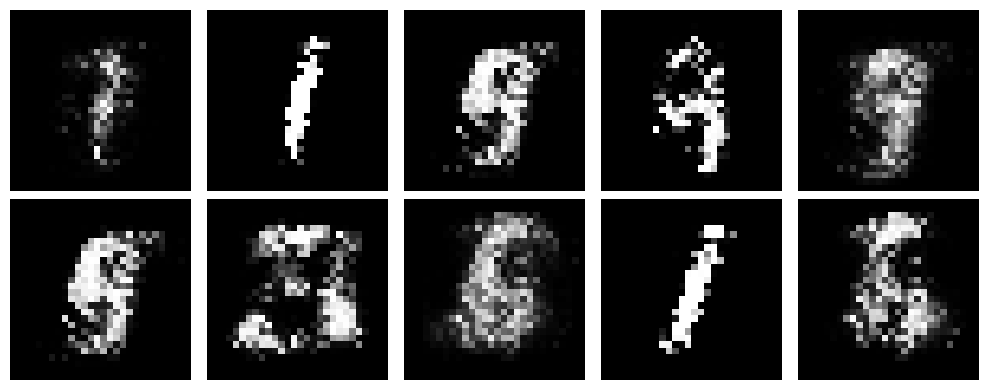

epoch: 1 loss generator: -2.2361 loss discriminator: -0.8333


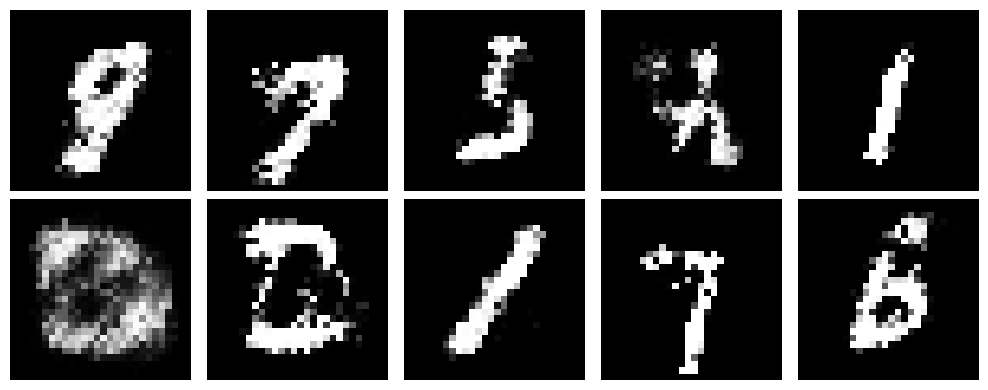

epoch: 2 loss generator: -1.4696 loss discriminator: -1.0825


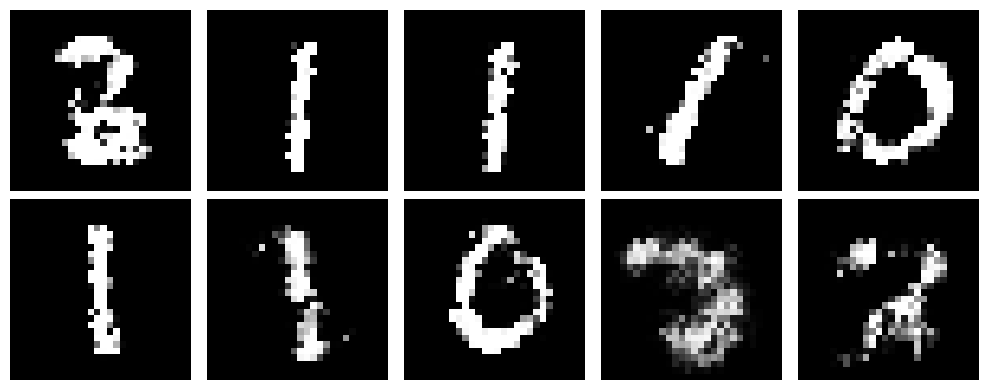

epoch: 3 loss generator: -1.1646 loss discriminator: -1.2033


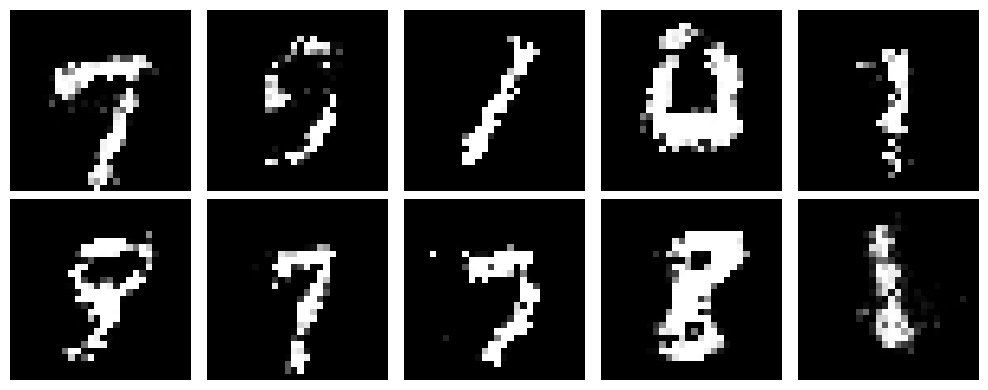

epoch: 4 loss generator: -1.1179 loss discriminator: -1.2254


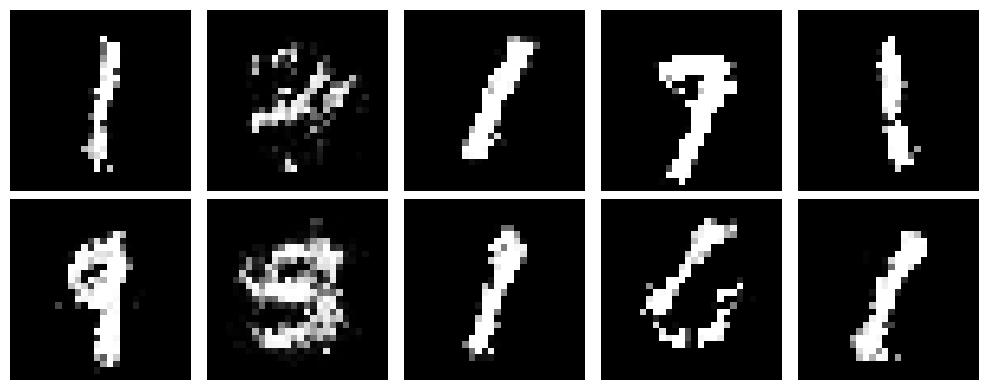

epoch: 5 loss generator: -1.0851 loss discriminator: -1.2346


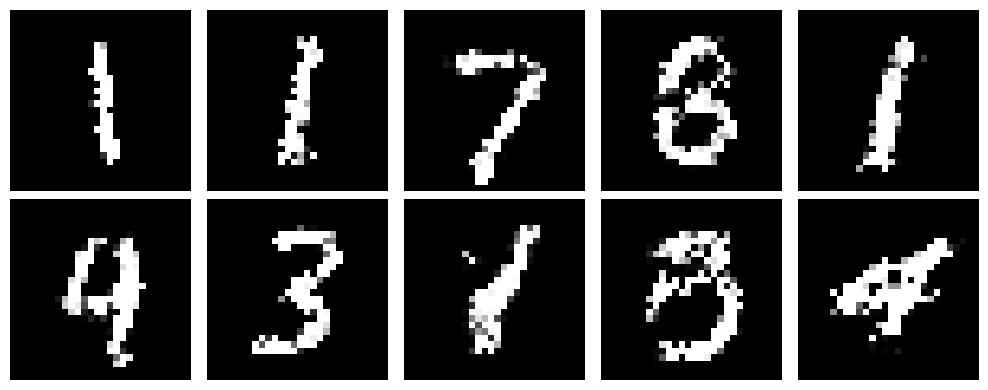

epoch: 6 loss generator: -1.0817 loss discriminator: -1.2315


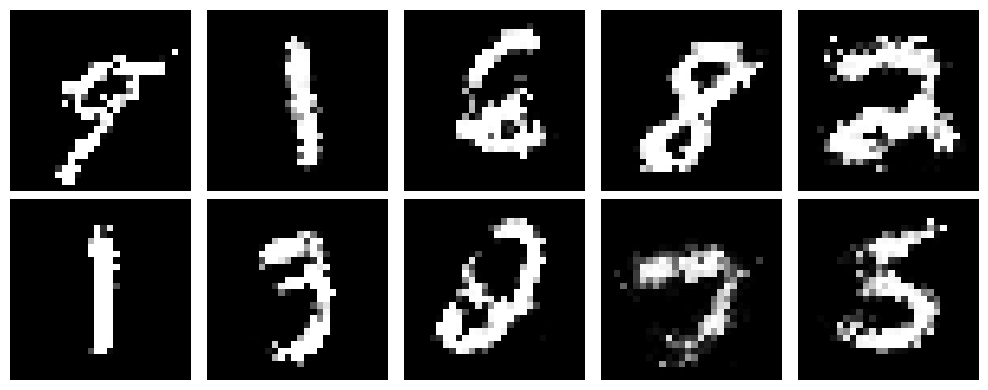

epoch: 7 loss generator: -1.0977 loss discriminator: -1.2250


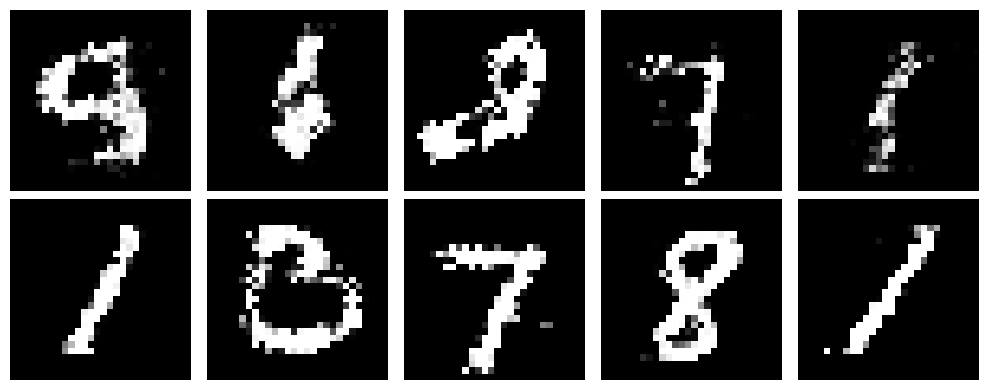

epoch: 8 loss generator: -1.0680 loss discriminator: -1.2400


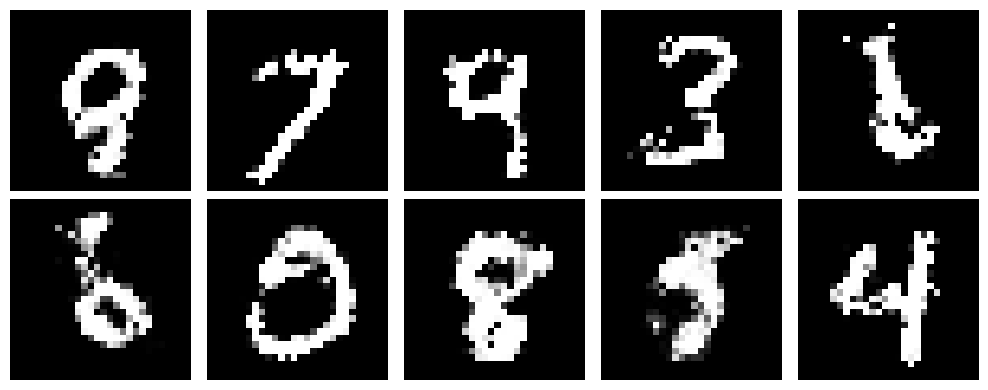

epoch: 9 loss generator: -1.0708 loss discriminator: -1.2413


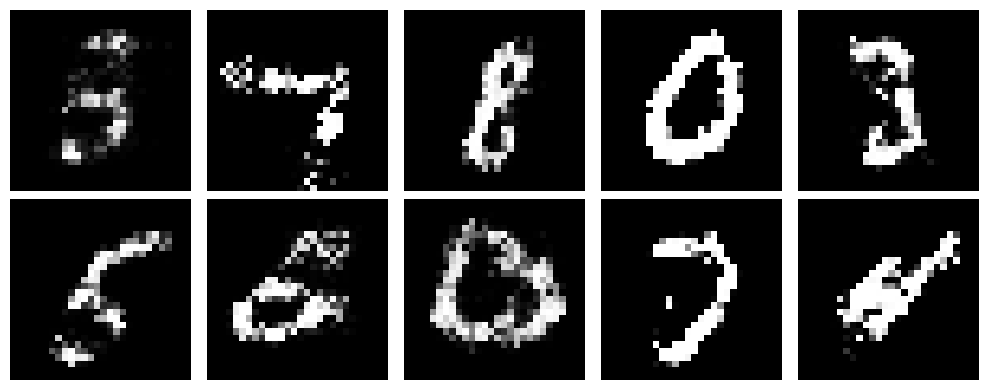

epoch: 10 loss generator: -1.0460 loss discriminator: -1.2495


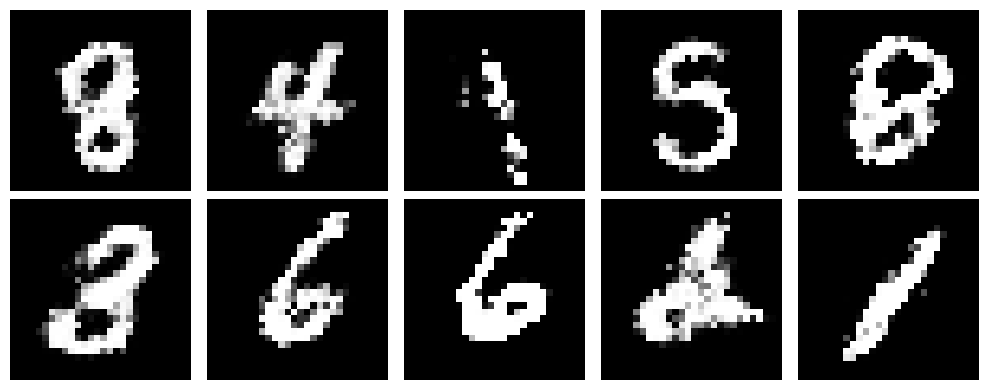

epoch: 11 loss generator: -1.0516 loss discriminator: -1.2500


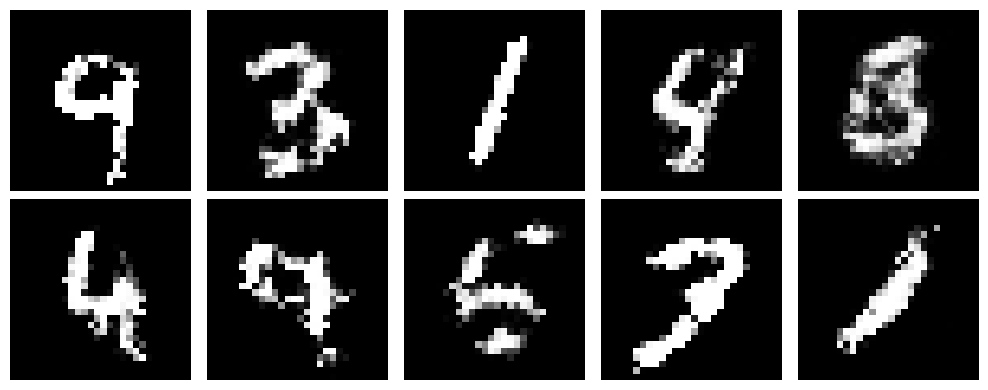

epoch: 12 loss generator: -1.0472 loss discriminator: -1.2550


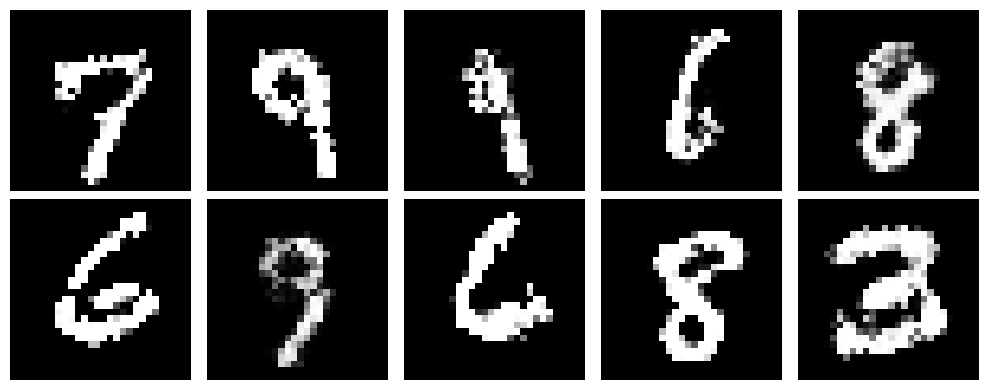

epoch: 13 loss generator: -1.0588 loss discriminator: -1.2521


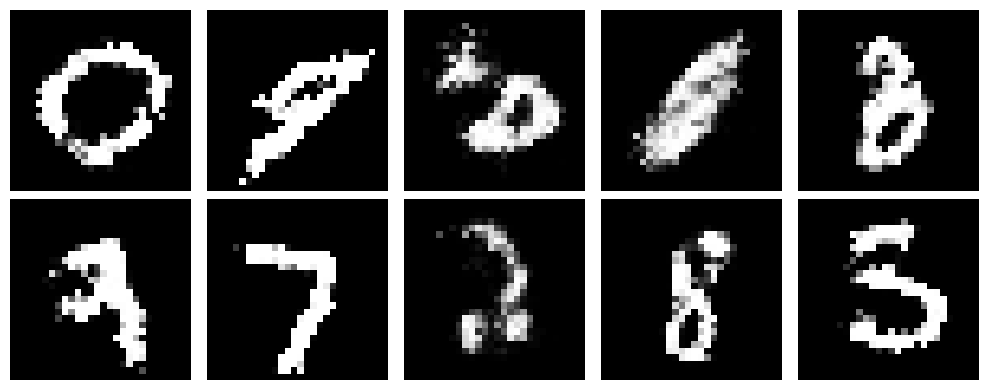

epoch: 14 loss generator: -1.0582 loss discriminator: -1.2503


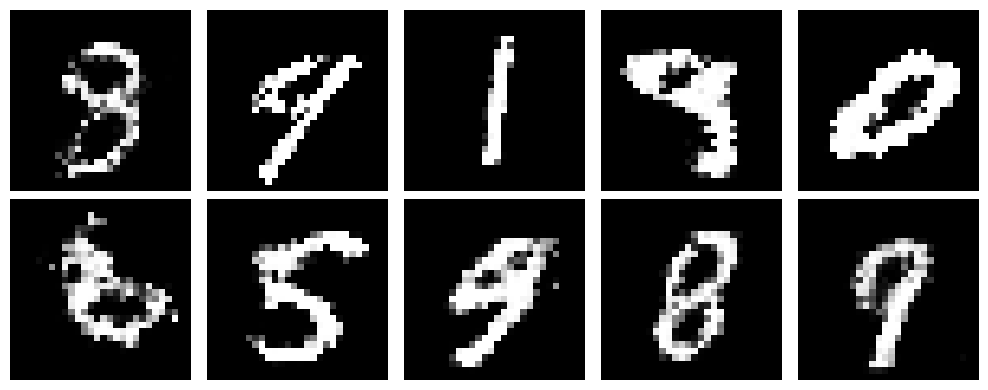

epoch: 15 loss generator: -1.0812 loss discriminator: -1.2469


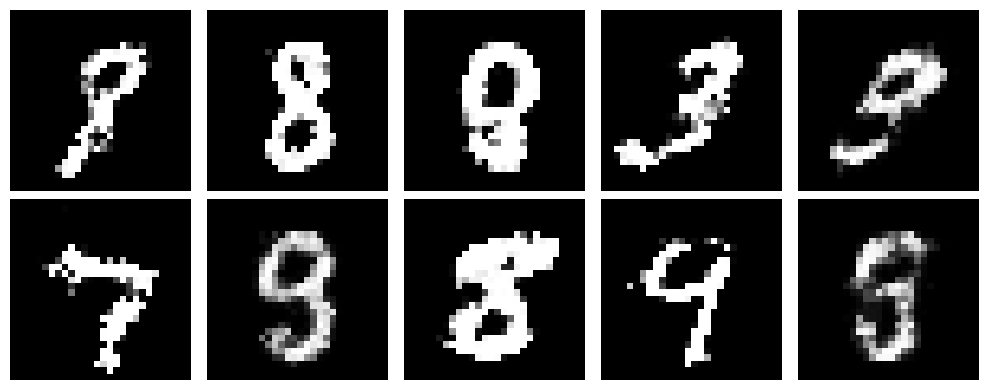

epoch: 16 loss generator: -1.0910 loss discriminator: -1.2401


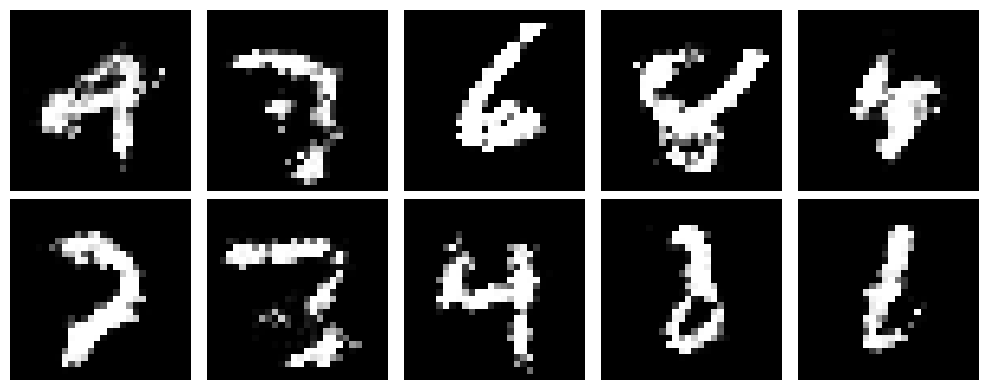

epoch: 17 loss generator: -1.1119 loss discriminator: -1.2333


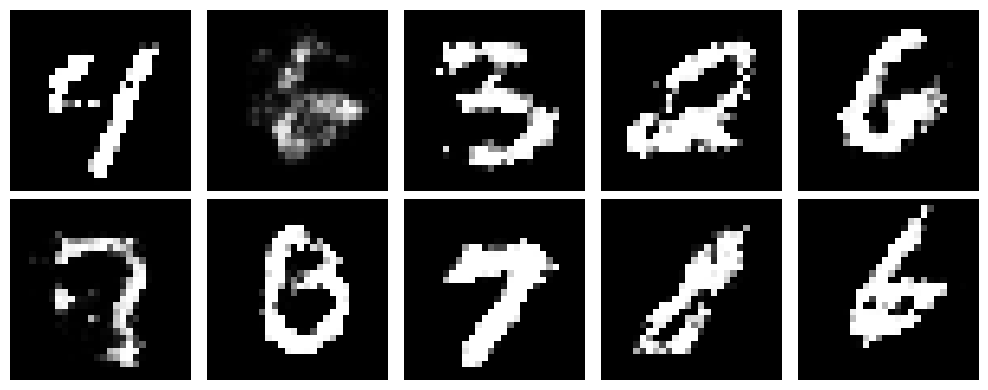

epoch: 18 loss generator: -1.1354 loss discriminator: -1.2245


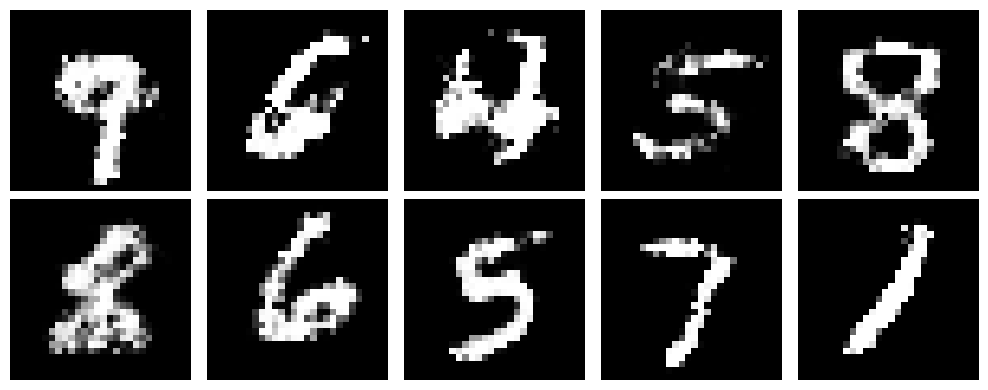

epoch: 19 loss generator: -1.1561 loss discriminator: -1.2182


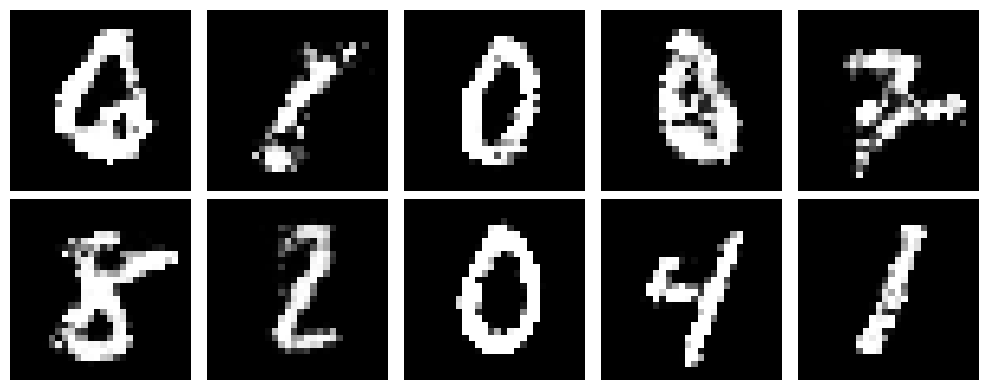

epoch: 20 loss generator: -1.1841 loss discriminator: -1.2072


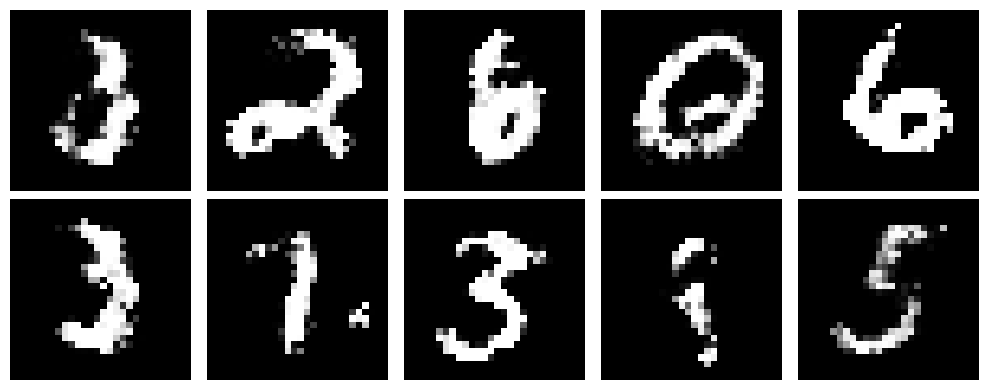

epoch: 21 loss generator: -1.2071 loss discriminator: -1.1989


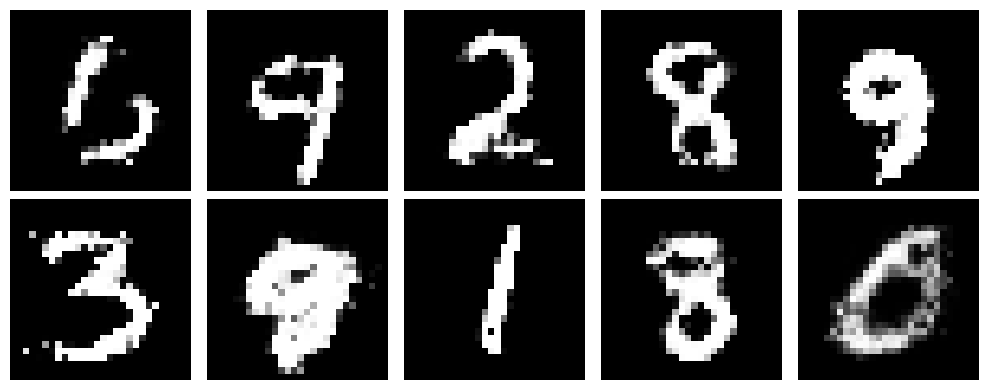

epoch: 22 loss generator: -1.2359 loss discriminator: -1.1898


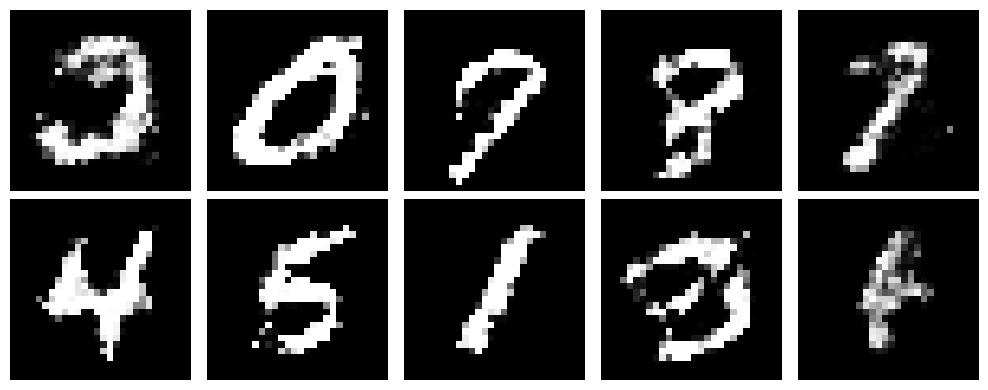

epoch: 23 loss generator: -1.2621 loss discriminator: -1.1787


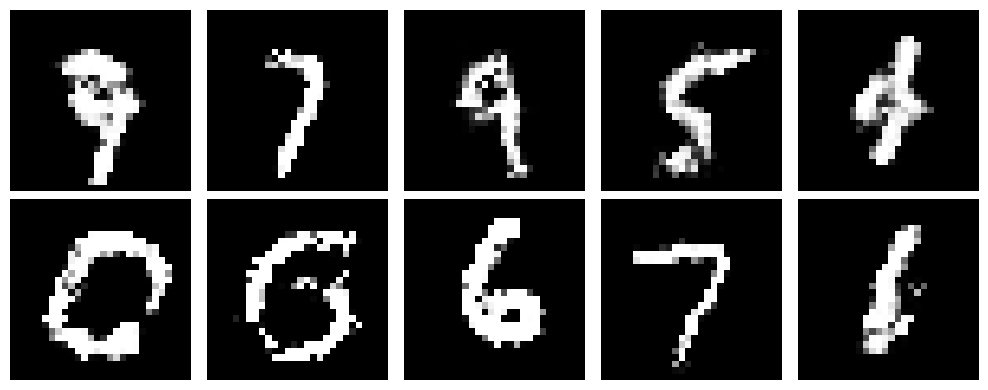

epoch: 24 loss generator: -1.2800 loss discriminator: -1.1724


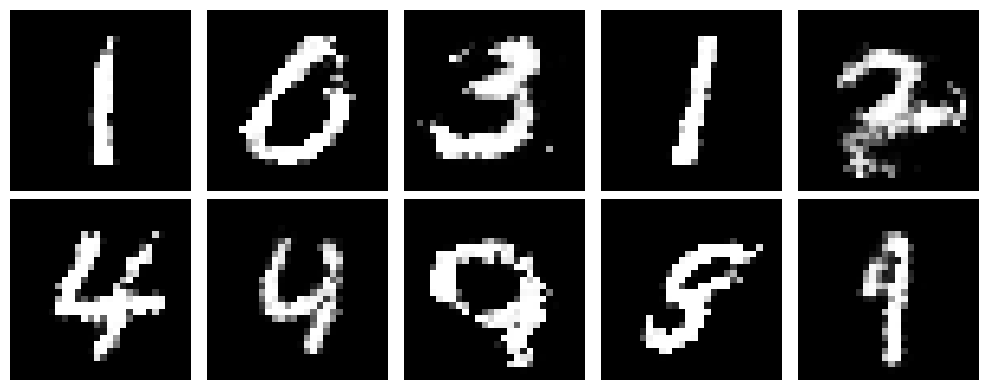

epoch: 25 loss generator: -1.2996 loss discriminator: -1.1672


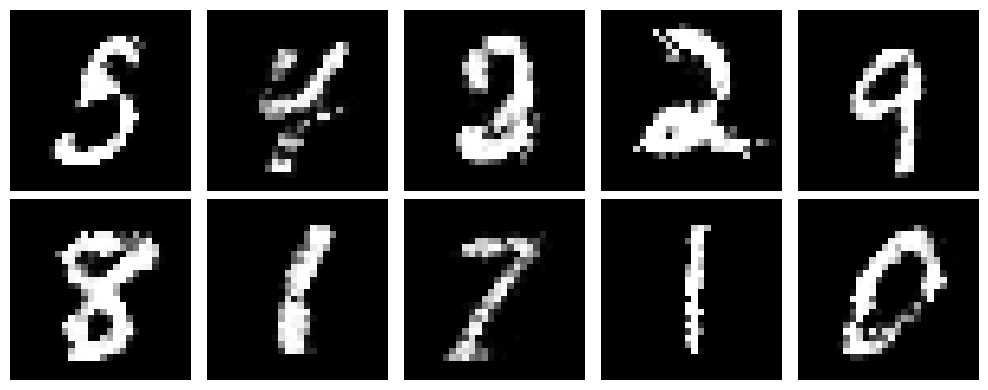

epoch: 26 loss generator: -1.3355 loss discriminator: -1.1594


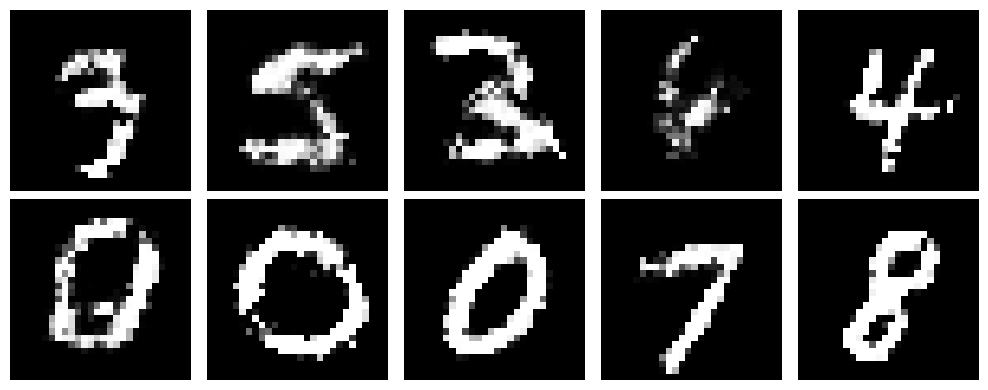

epoch: 27 loss generator: -1.3590 loss discriminator: -1.1508


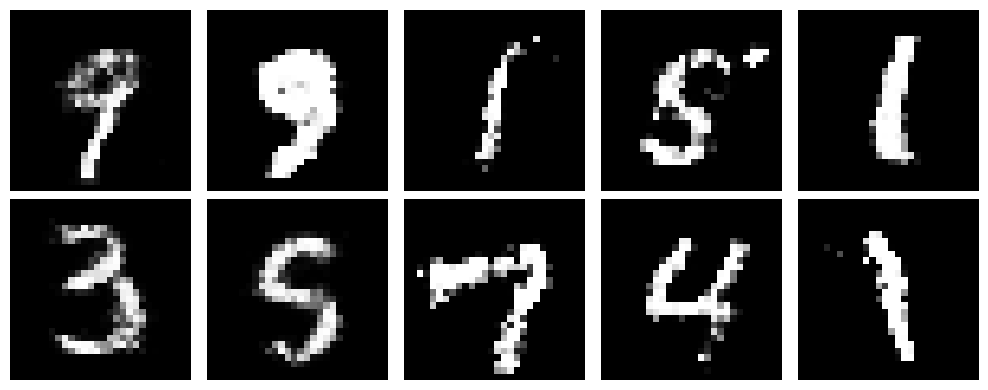

epoch: 28 loss generator: -1.3810 loss discriminator: -1.1404


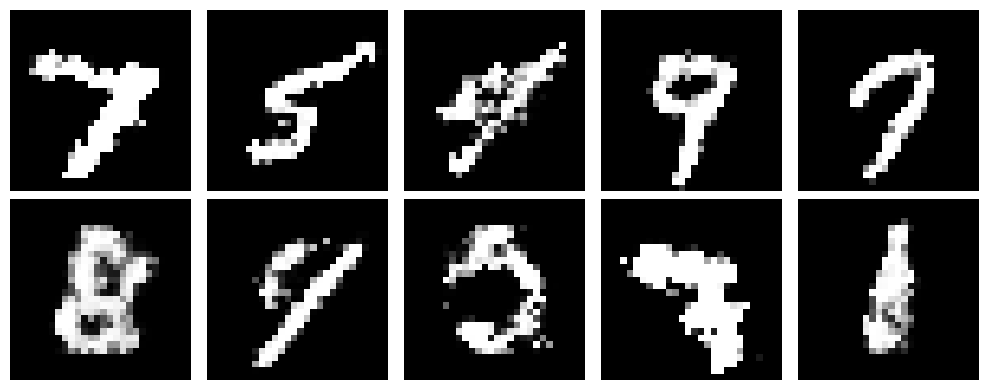

epoch: 29 loss generator: -1.3770 loss discriminator: -1.1384


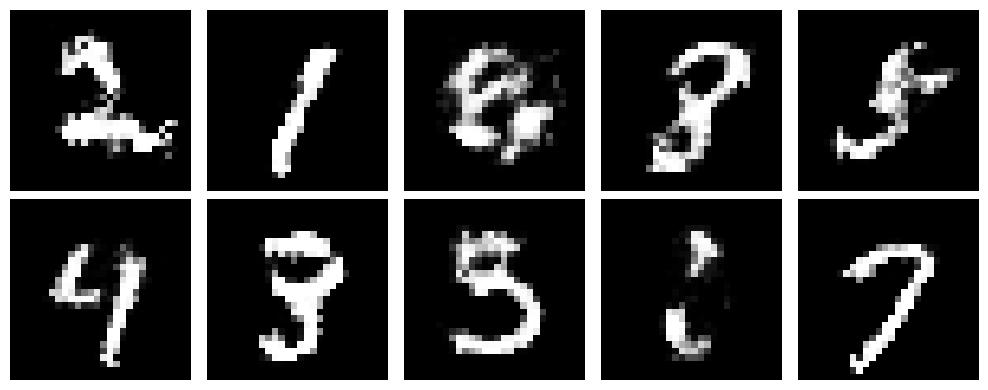

epoch: 30 loss generator: -1.4003 loss discriminator: -1.1370


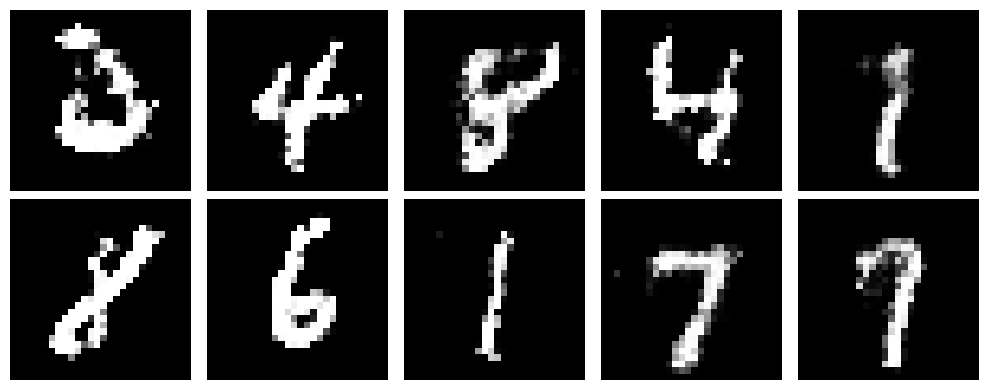

epoch: 31 loss generator: -1.4181 loss discriminator: -1.1261


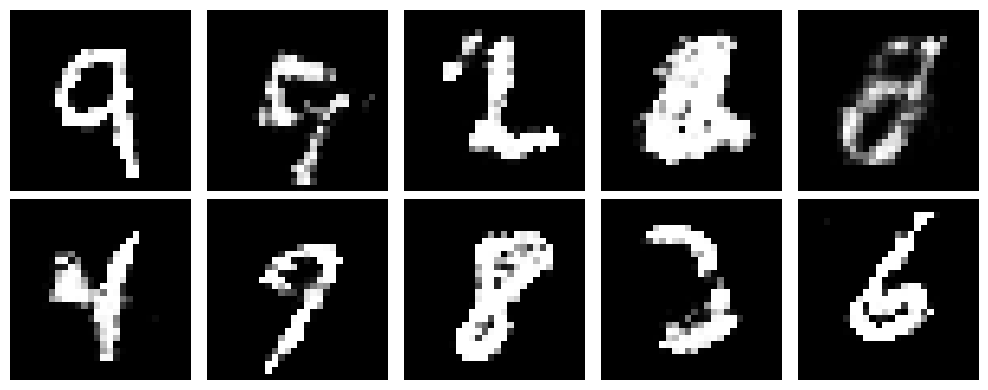

epoch: 32 loss generator: -1.4445 loss discriminator: -1.1254


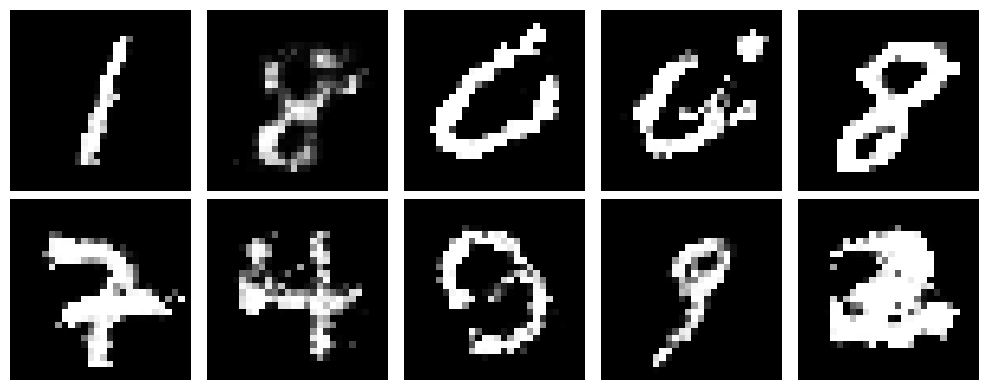

epoch: 33 loss generator: -1.4650 loss discriminator: -1.1135


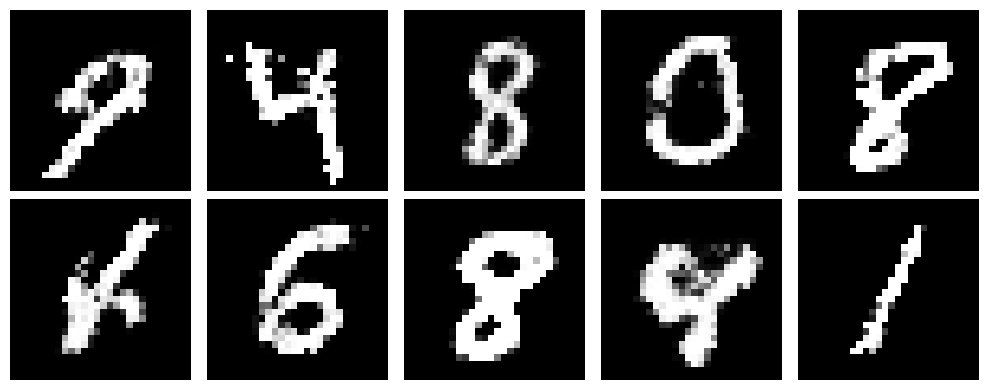

epoch: 34 loss generator: -1.4597 loss discriminator: -1.1185


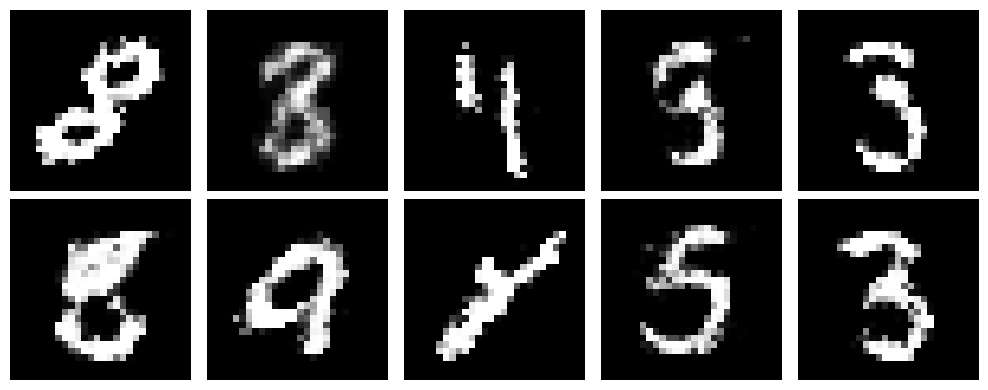

epoch: 35 loss generator: -1.4933 loss discriminator: -1.1094


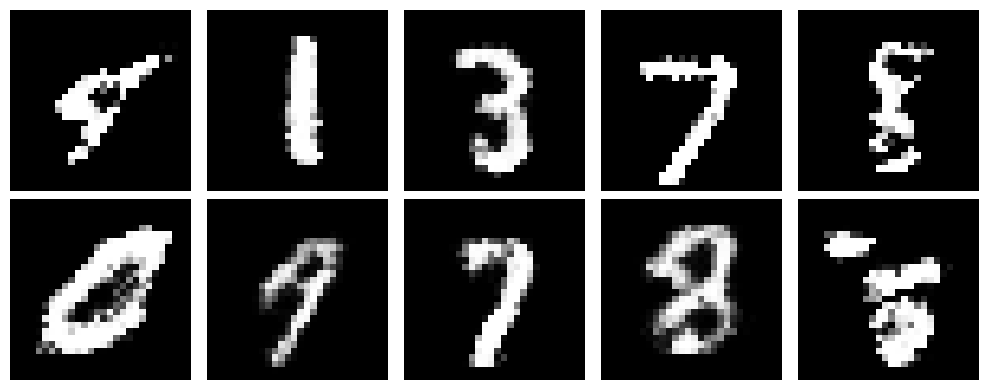

epoch: 36 loss generator: -1.5068 loss discriminator: -1.1026


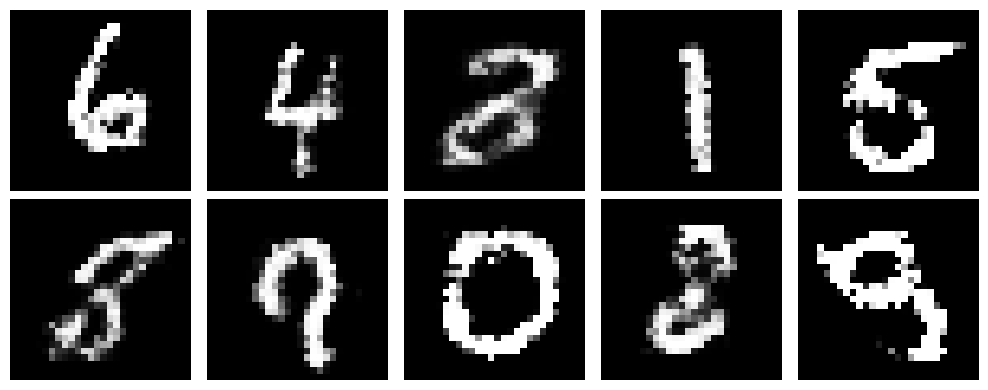

epoch: 37 loss generator: -1.5021 loss discriminator: -1.1047


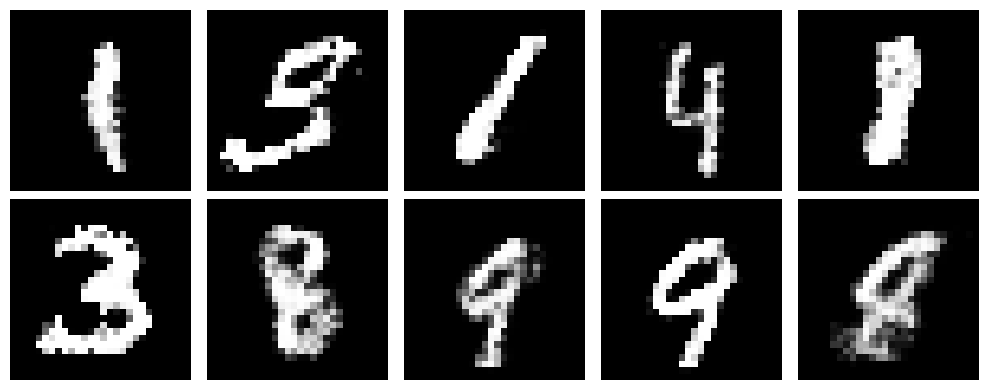

epoch: 38 loss generator: -1.5360 loss discriminator: -1.0939


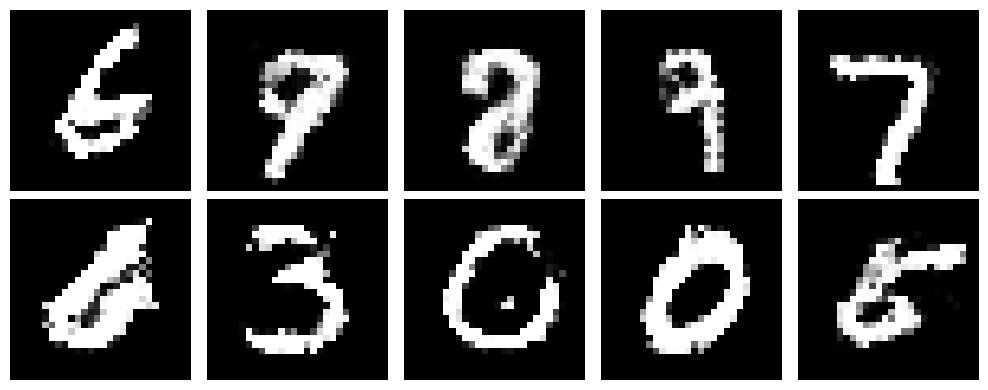

epoch: 39 loss generator: -1.5285 loss discriminator: -1.0963


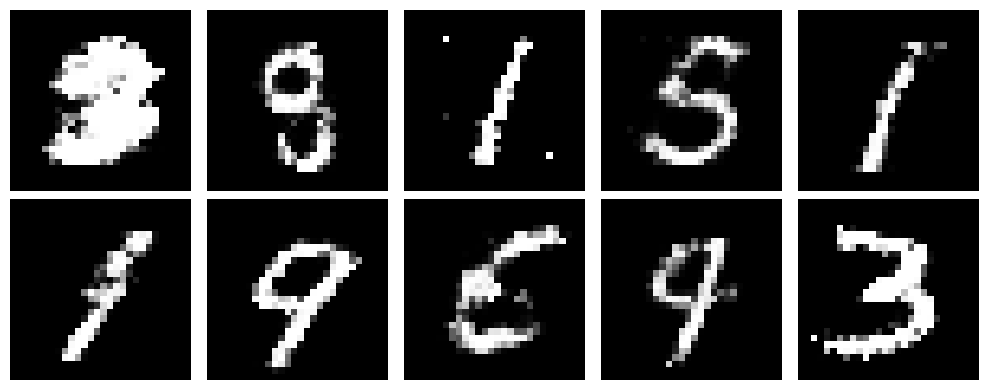

epoch: 40 loss generator: -1.5213 loss discriminator: -1.0988


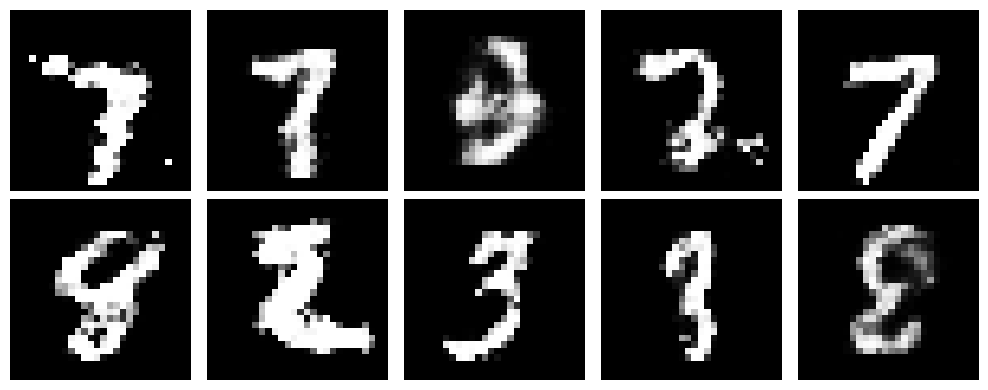

epoch: 41 loss generator: -1.5291 loss discriminator: -1.0967


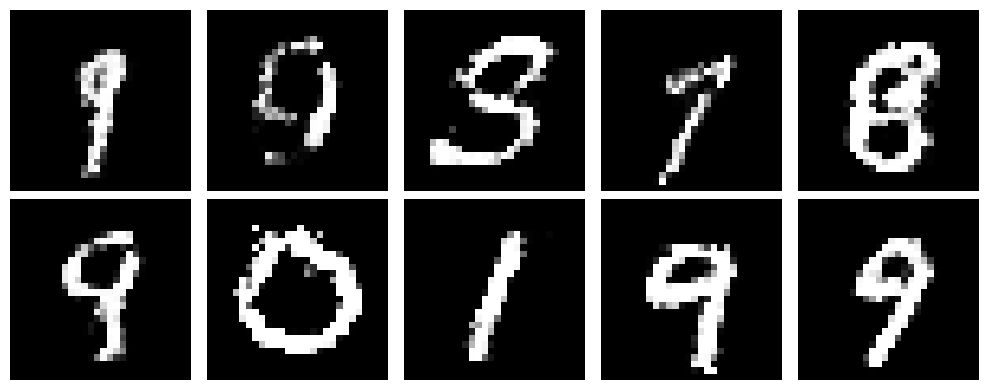

epoch: 42 loss generator: -1.5258 loss discriminator: -1.1029


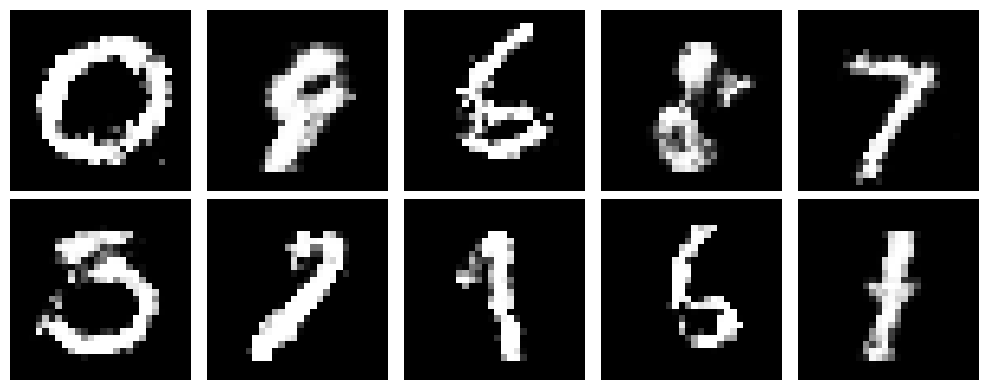

epoch: 43 loss generator: -1.5446 loss discriminator: -1.0952


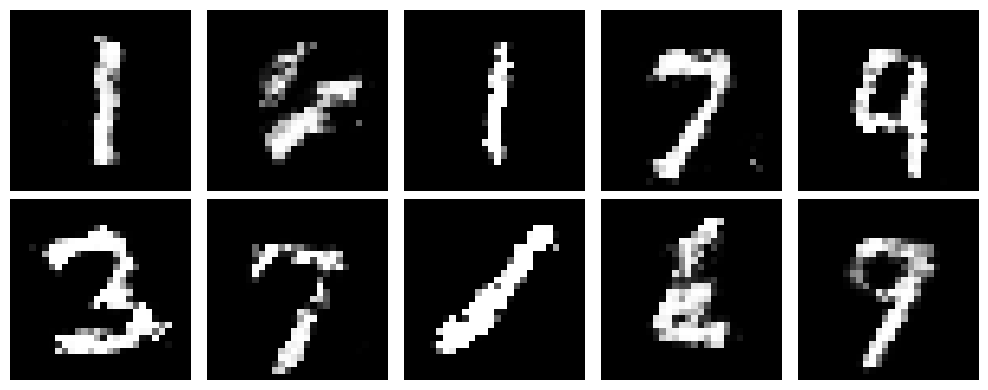

epoch: 44 loss generator: -1.5431 loss discriminator: -1.0992


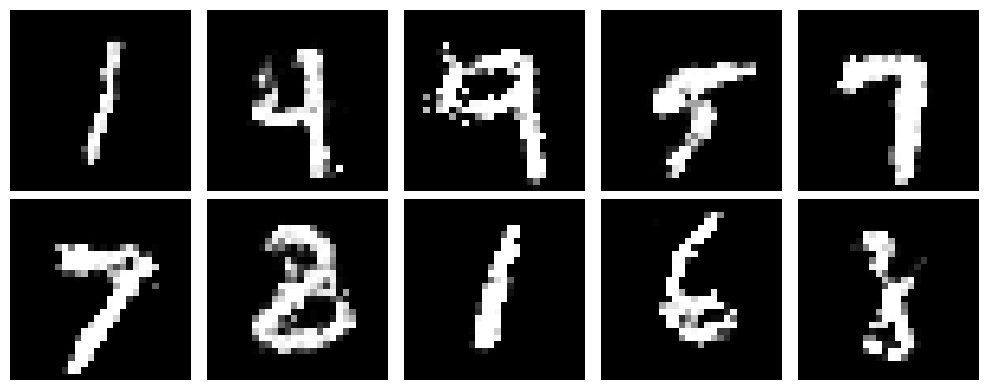

epoch: 45 loss generator: -1.5436 loss discriminator: -1.0976


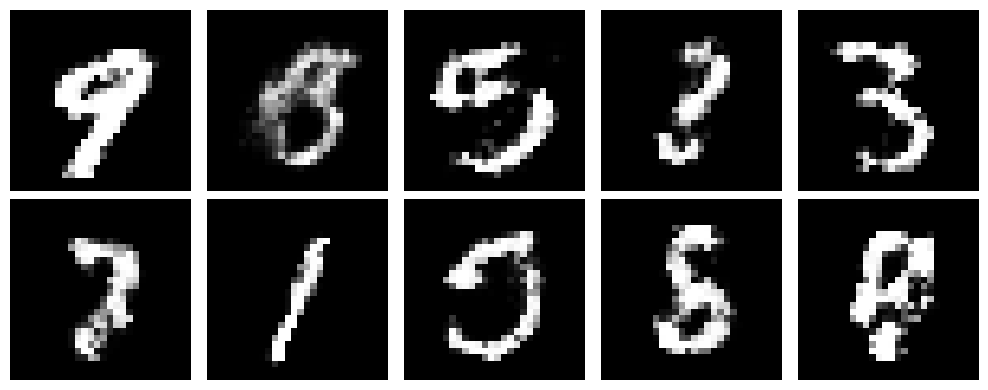

epoch: 46 loss generator: -1.5591 loss discriminator: -1.1052


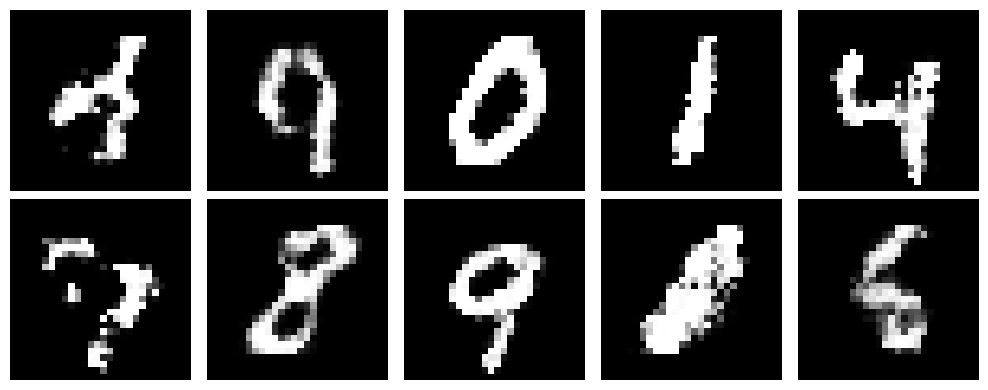

epoch: 47 loss generator: -1.5547 loss discriminator: -1.0993


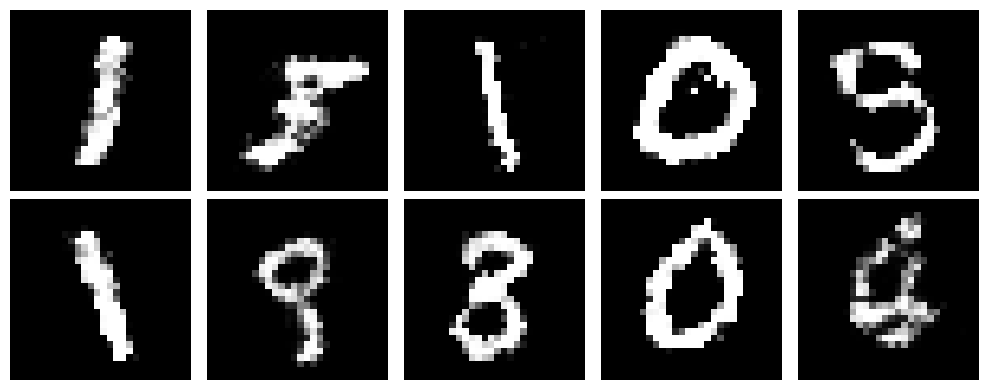

epoch: 48 loss generator: -1.5592 loss discriminator: -1.0918


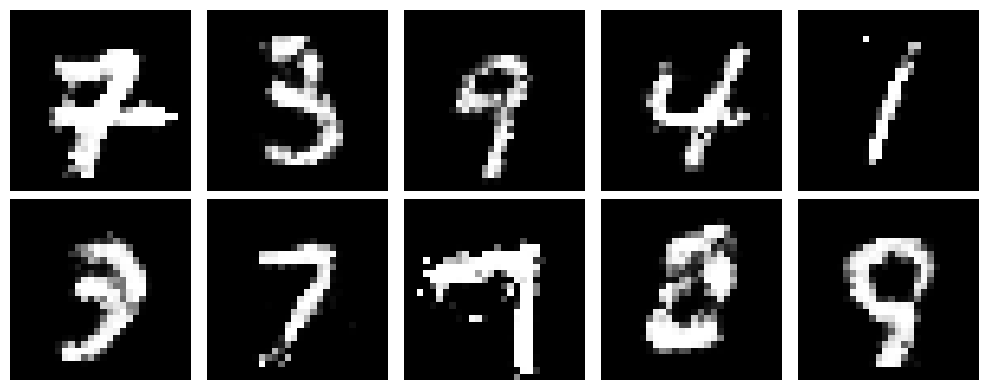

epoch: 49 loss generator: -1.5689 loss discriminator: -1.0886


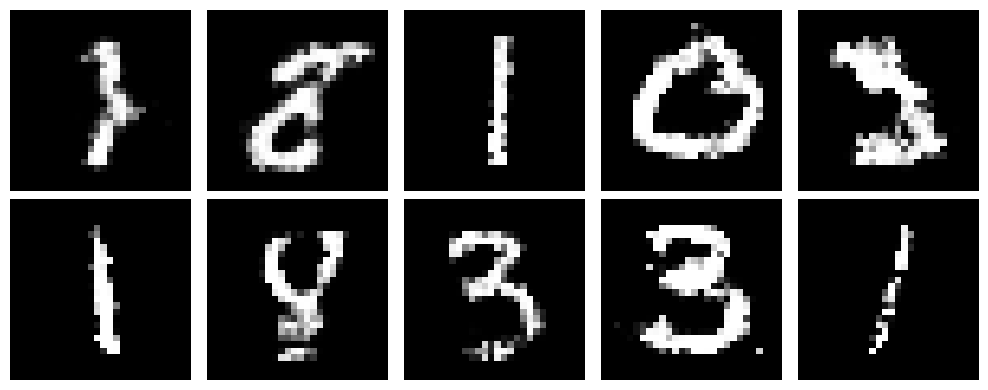

epoch: 50 loss generator: -1.5485 loss discriminator: -1.0975


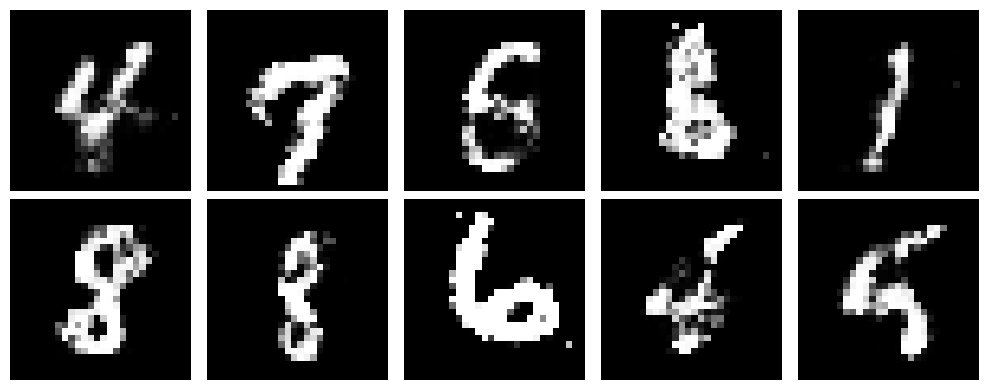

epoch: 51 loss generator: -1.5685 loss discriminator: -1.0960


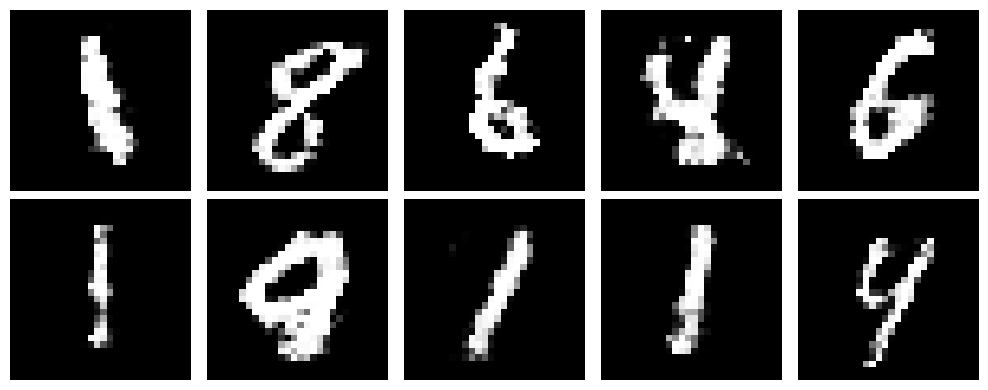

epoch: 52 loss generator: -1.5429 loss discriminator: -1.1031


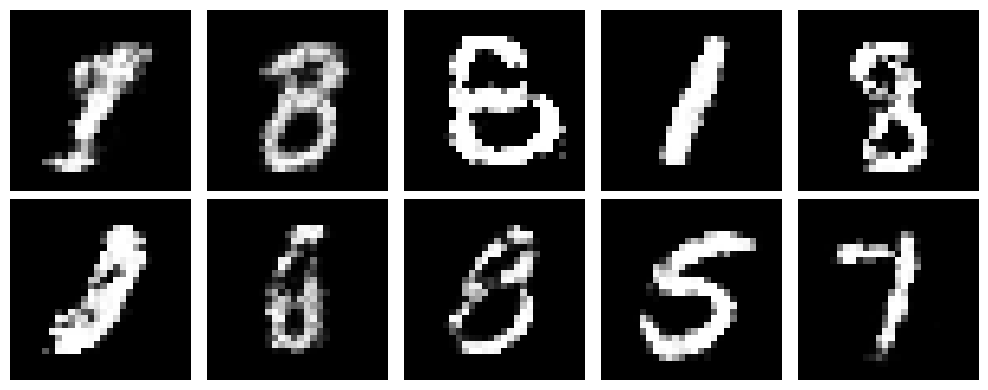

epoch: 53 loss generator: -1.5560 loss discriminator: -1.0949


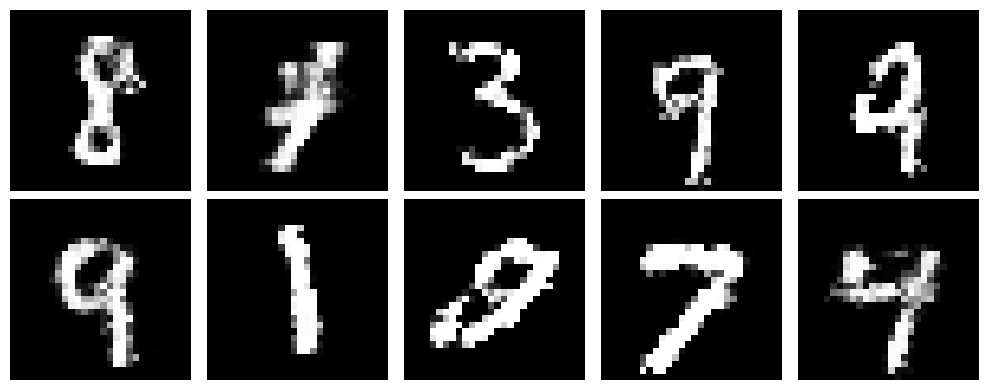

epoch: 54 loss generator: -1.5410 loss discriminator: -1.1032


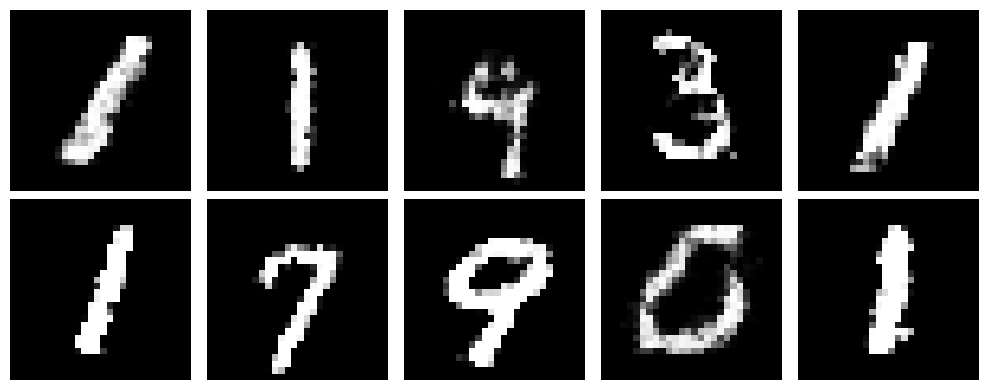

epoch: 55 loss generator: -1.5557 loss discriminator: -1.0927


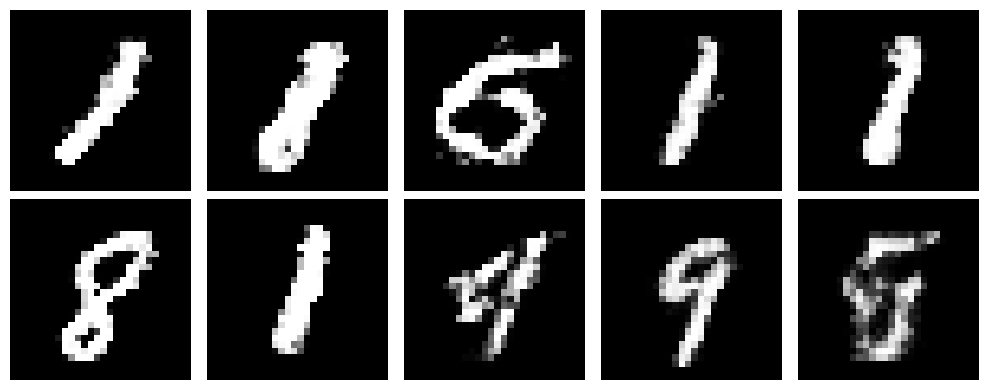

epoch: 56 loss generator: -1.5263 loss discriminator: -1.1012


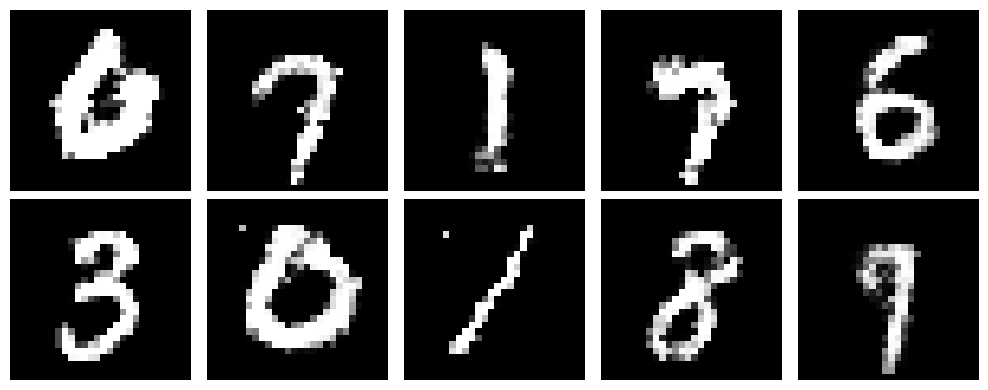

epoch: 57 loss generator: -1.5441 loss discriminator: -1.0951


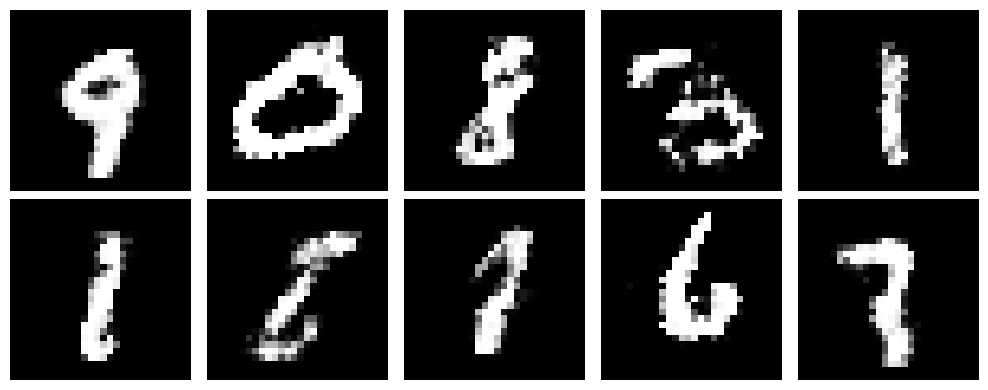

epoch: 58 loss generator: -1.5527 loss discriminator: -1.0960


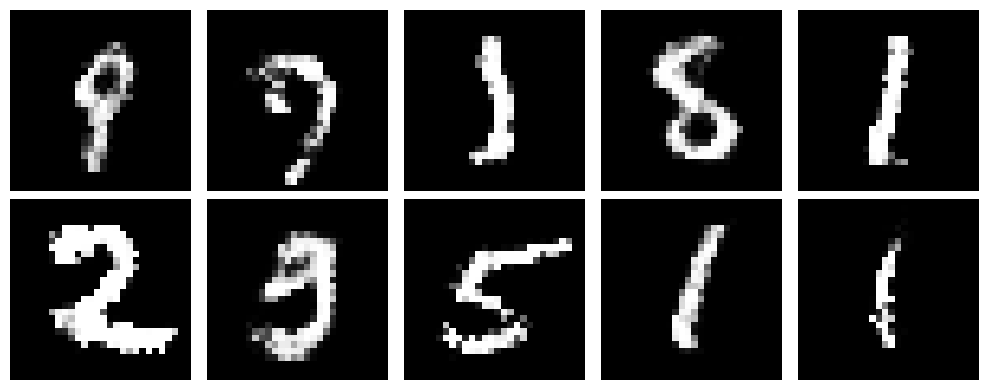

epoch: 59 loss generator: -1.5278 loss discriminator: -1.1046


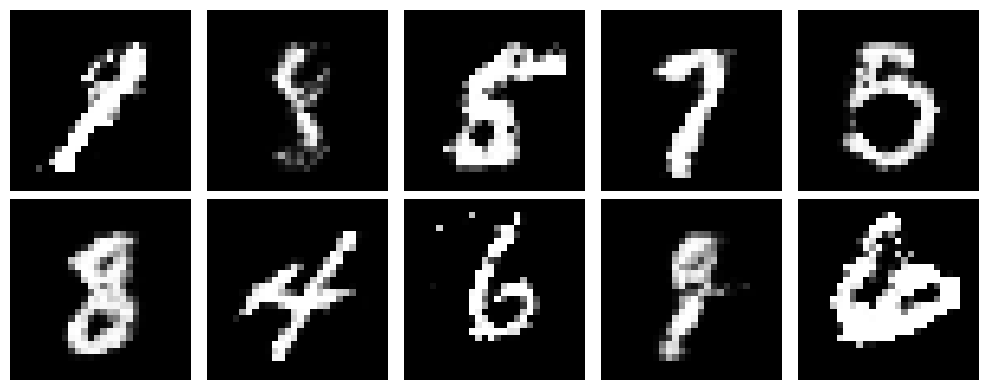

epoch: 60 loss generator: -1.5383 loss discriminator: -1.1042


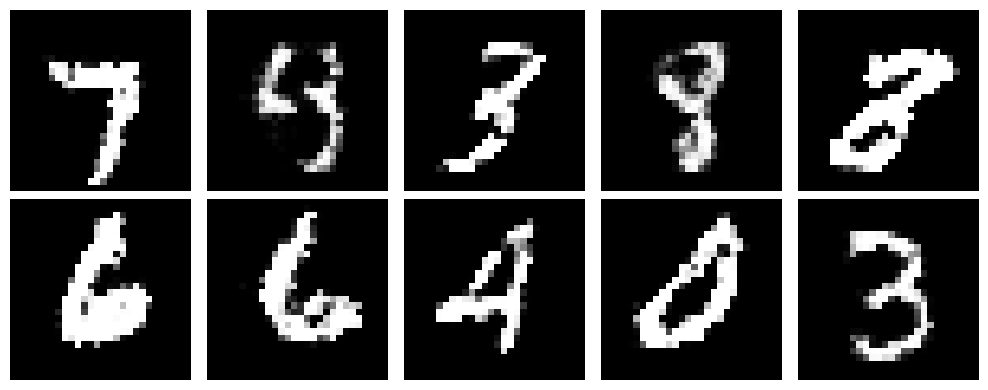

epoch: 61 loss generator: -1.5440 loss discriminator: -1.1000


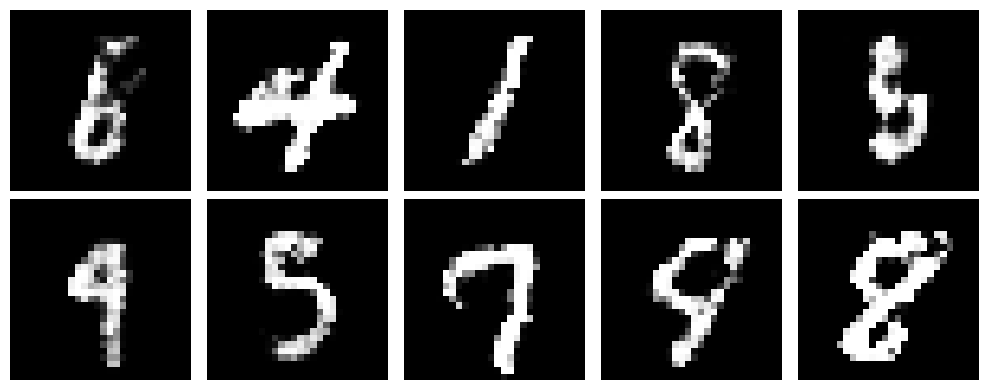

epoch: 62 loss generator: -1.5294 loss discriminator: -1.1001


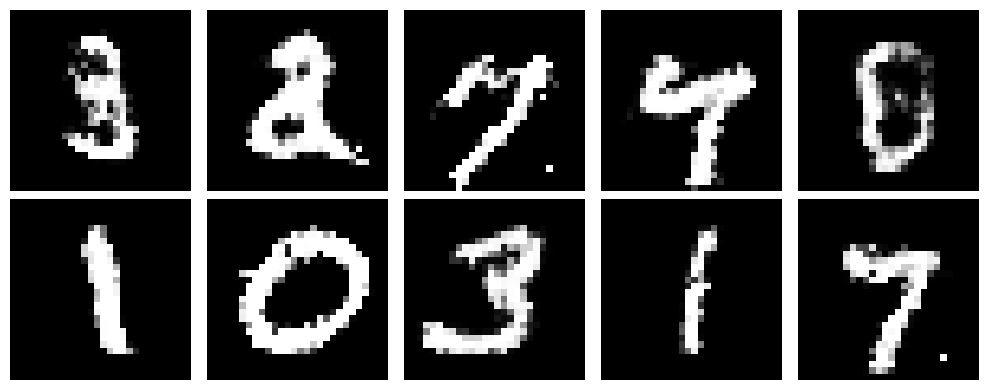

epoch: 63 loss generator: -1.5179 loss discriminator: -1.1062


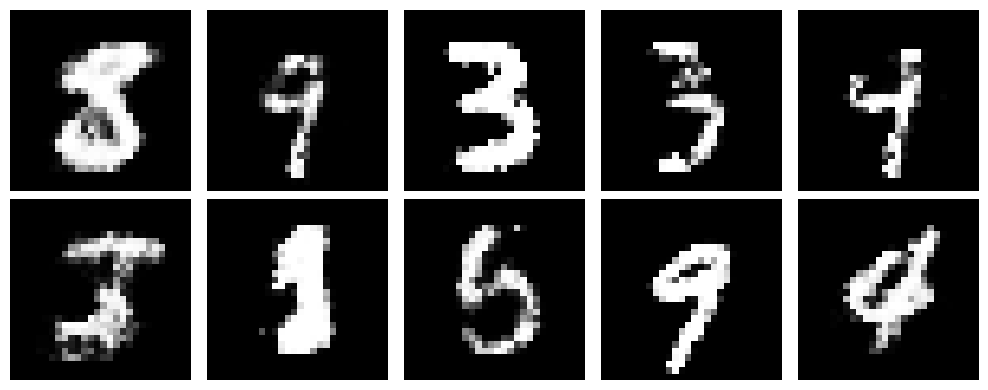

epoch: 64 loss generator: -1.5477 loss discriminator: -1.0951


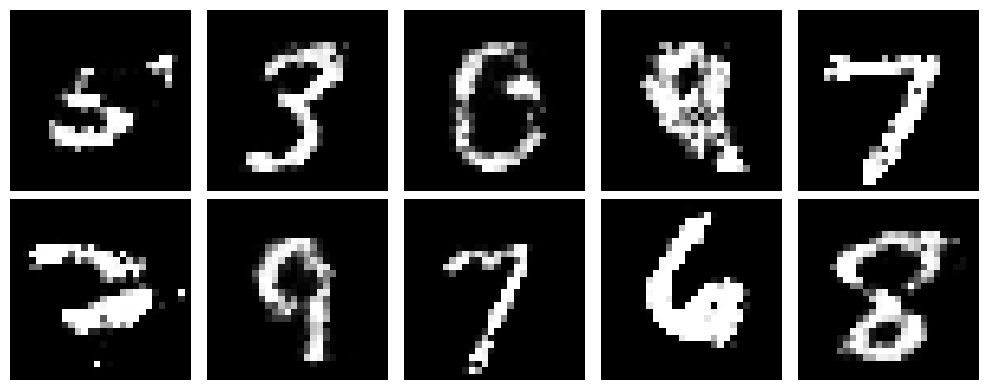

epoch: 65 loss generator: -1.5323 loss discriminator: -1.1020


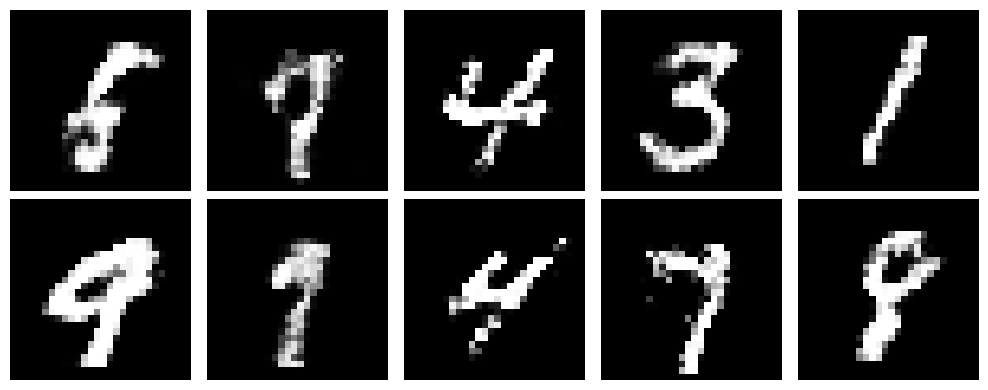

epoch: 66 loss generator: -1.5413 loss discriminator: -1.0986


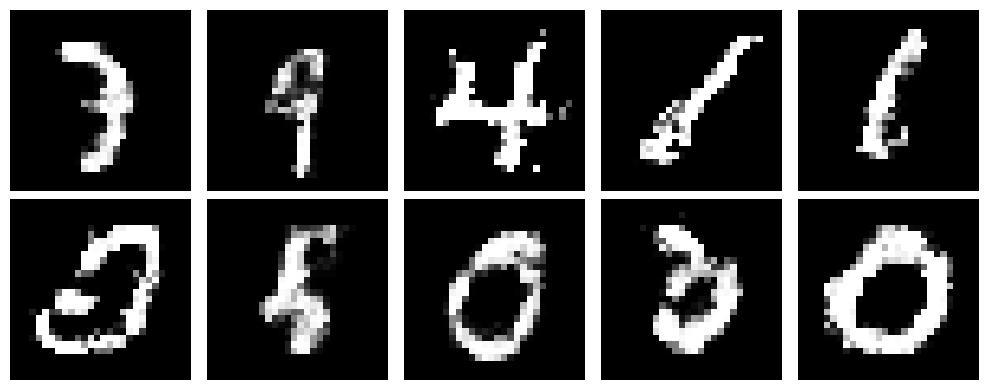

epoch: 67 loss generator: -1.5373 loss discriminator: -1.0997


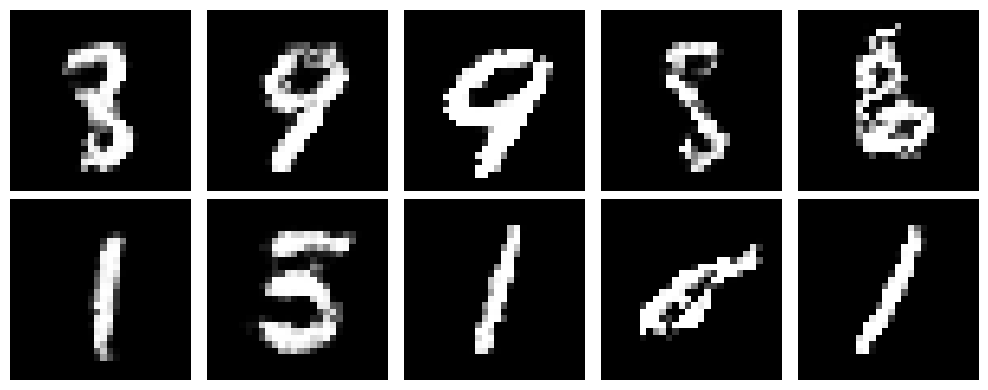

epoch: 68 loss generator: -1.5272 loss discriminator: -1.1009


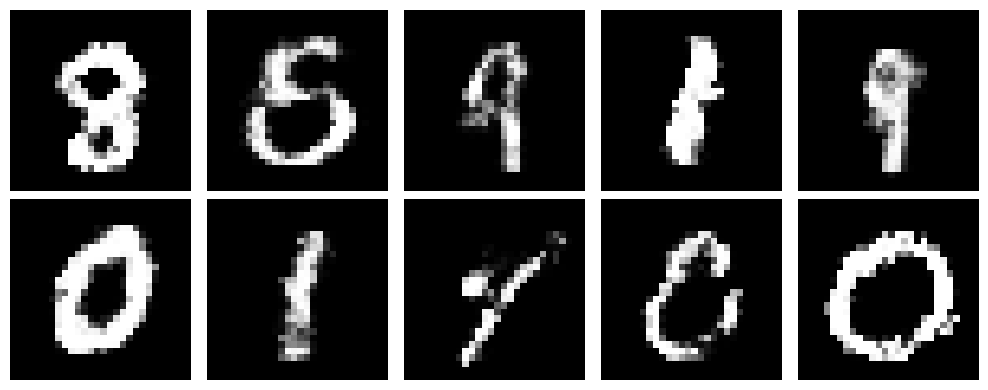

epoch: 69 loss generator: -1.5303 loss discriminator: -1.1039


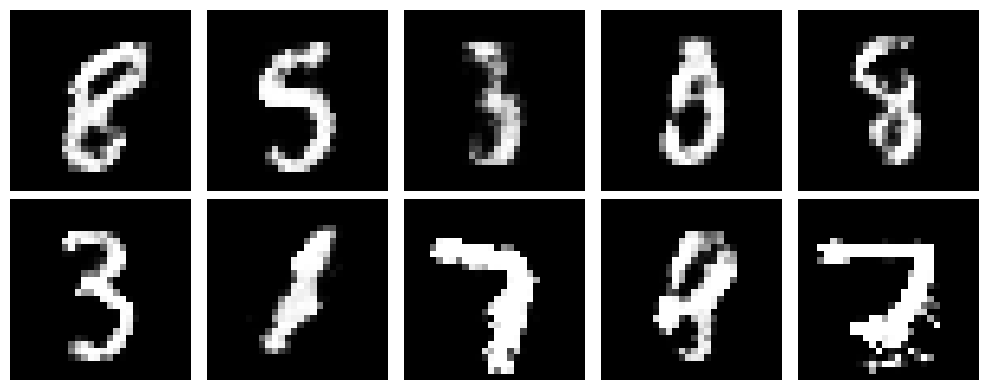

epoch: 70 loss generator: -1.5141 loss discriminator: -1.1108


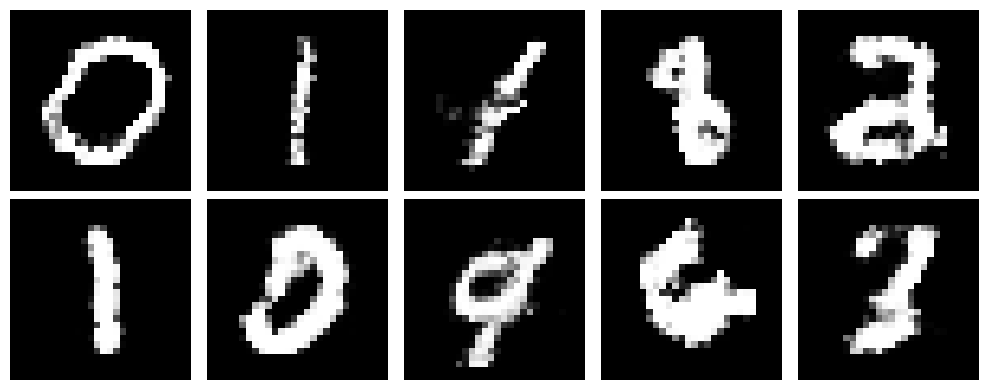

epoch: 71 loss generator: -1.5349 loss discriminator: -1.1038


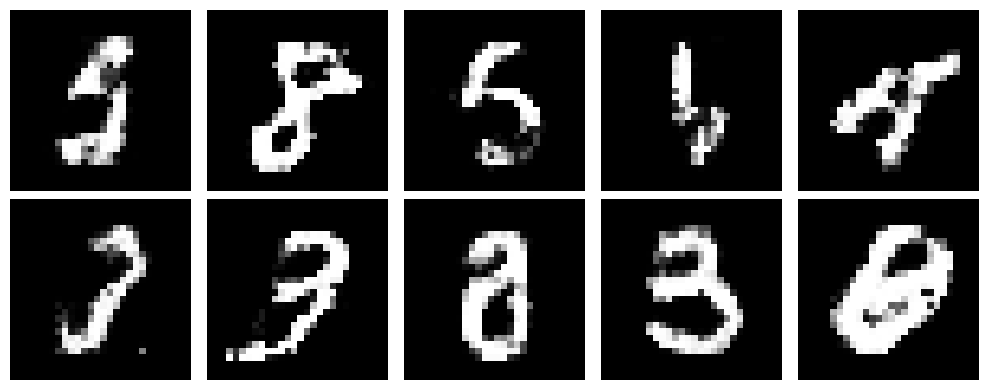

epoch: 72 loss generator: -1.5266 loss discriminator: -1.1058


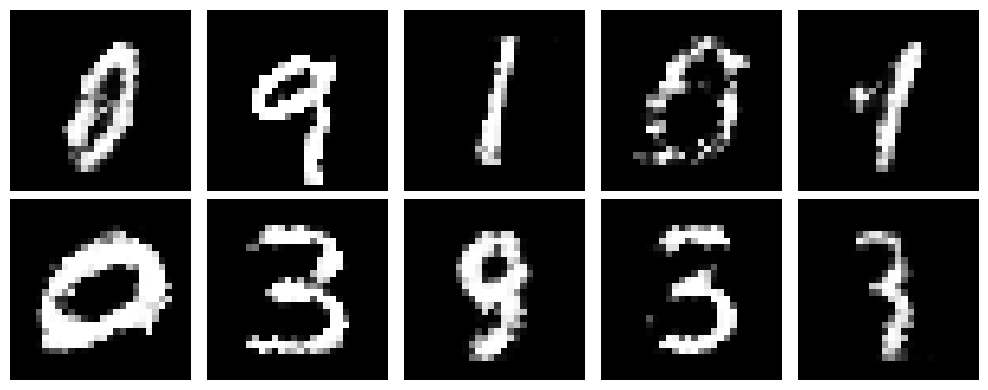

epoch: 73 loss generator: -1.5345 loss discriminator: -1.1036


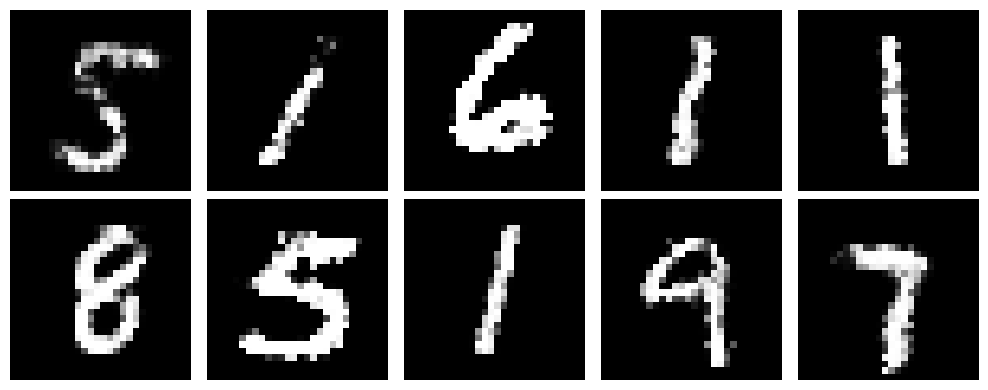

epoch: 74 loss generator: -1.5362 loss discriminator: -1.1009


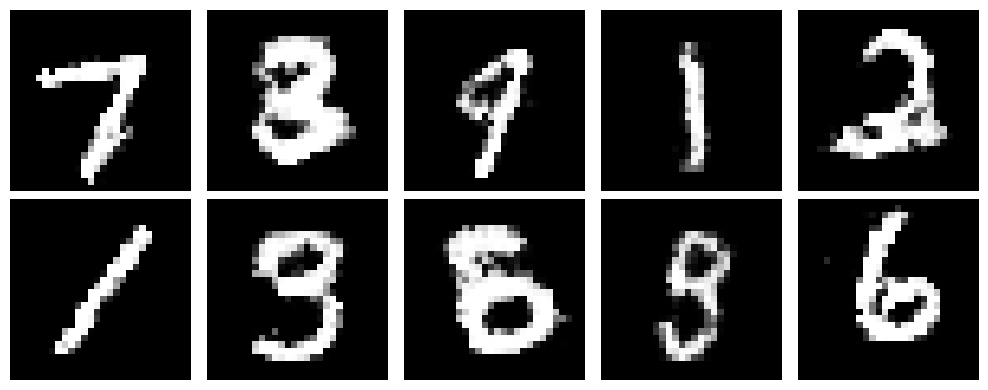

epoch: 75 loss generator: -1.5286 loss discriminator: -1.1043


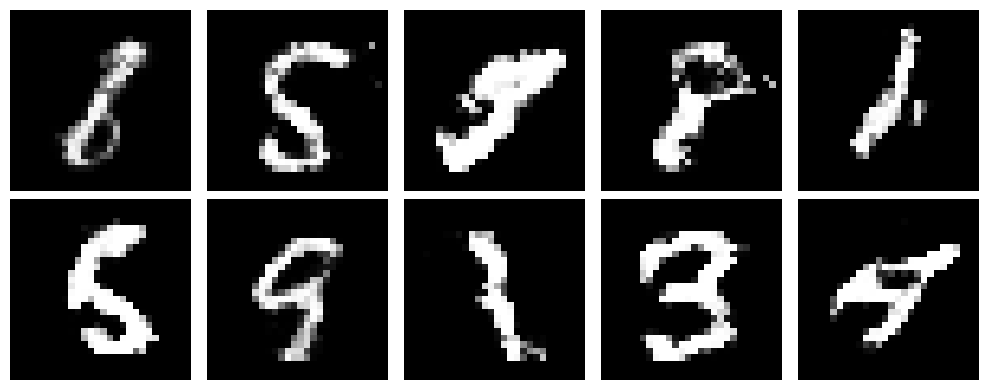

epoch: 76 loss generator: -1.5457 loss discriminator: -1.0962


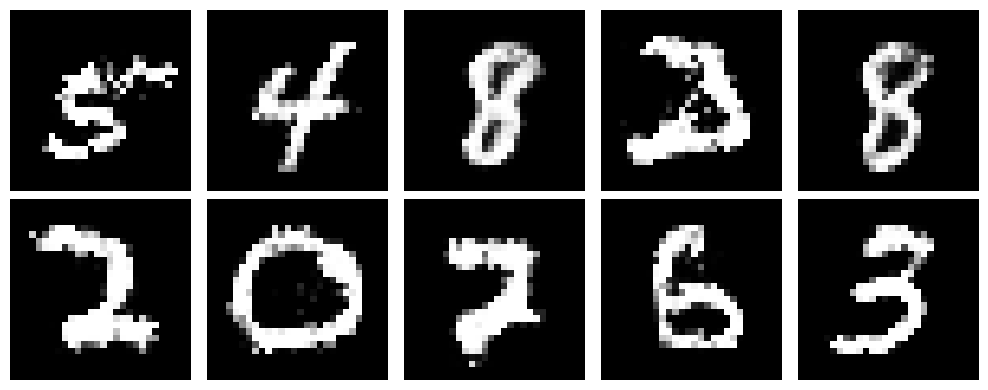

epoch: 77 loss generator: -1.5441 loss discriminator: -1.1026


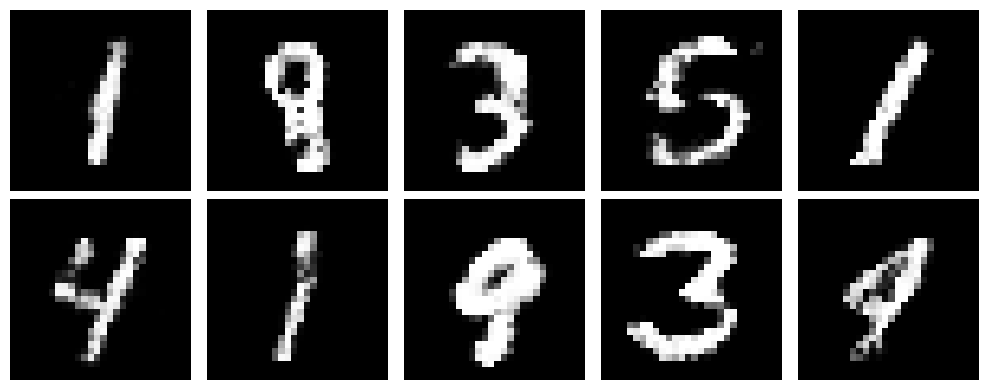

epoch: 78 loss generator: -1.5413 loss discriminator: -1.0997


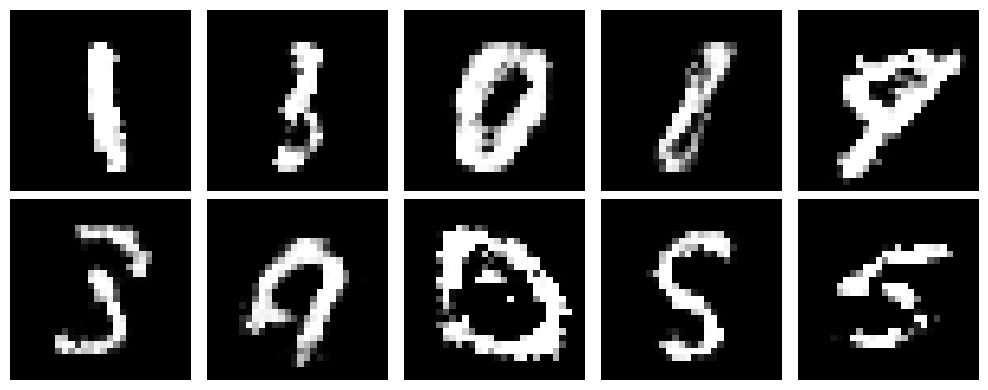

epoch: 79 loss generator: -1.5261 loss discriminator: -1.1086


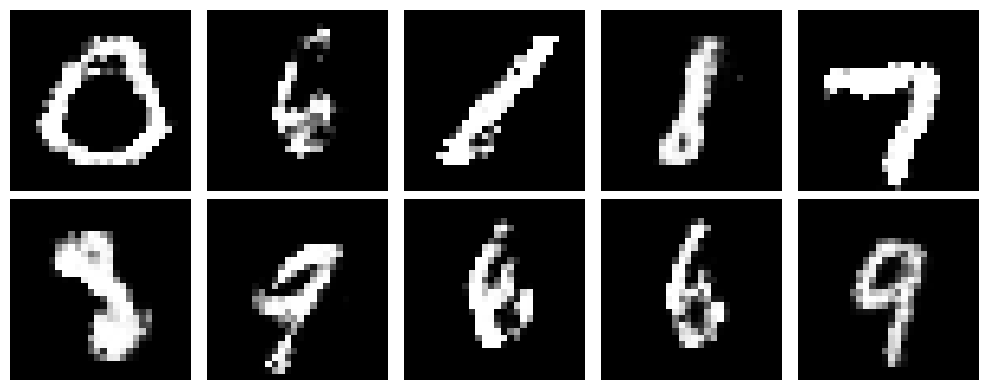

epoch: 80 loss generator: -1.5207 loss discriminator: -1.1066


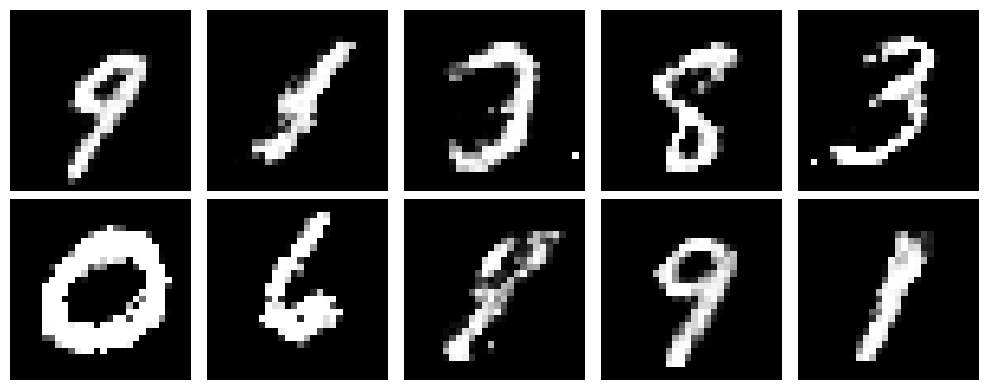

epoch: 81 loss generator: -1.5467 loss discriminator: -1.1015


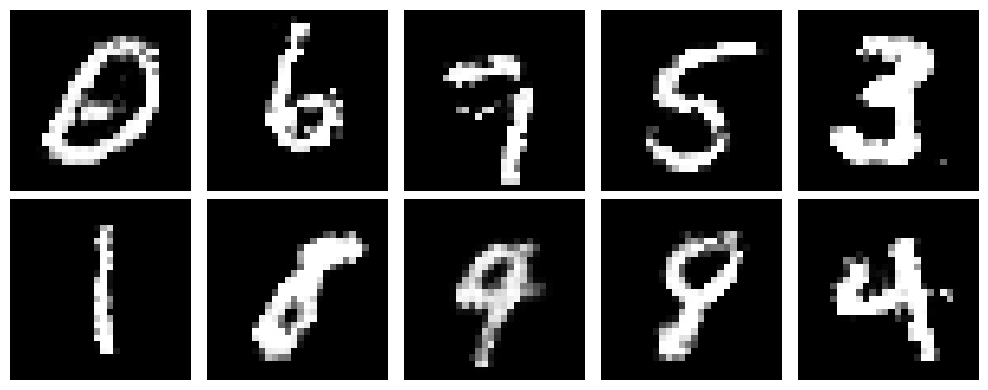

epoch: 82 loss generator: -1.5553 loss discriminator: -1.0977


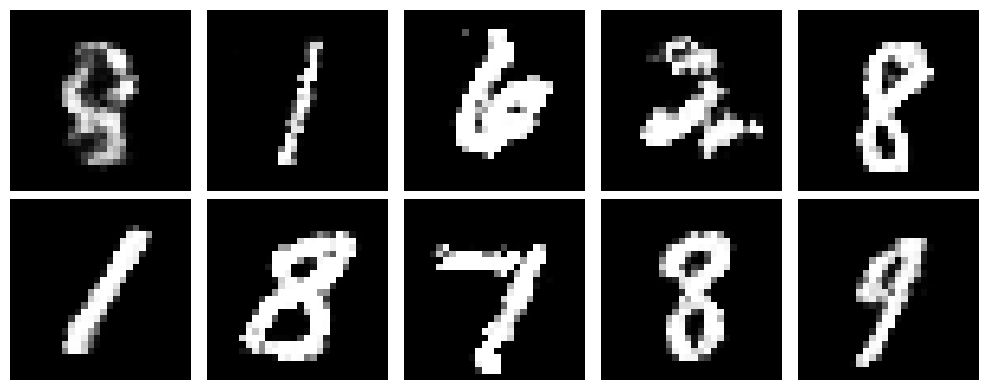

epoch: 83 loss generator: -1.5404 loss discriminator: -1.1039


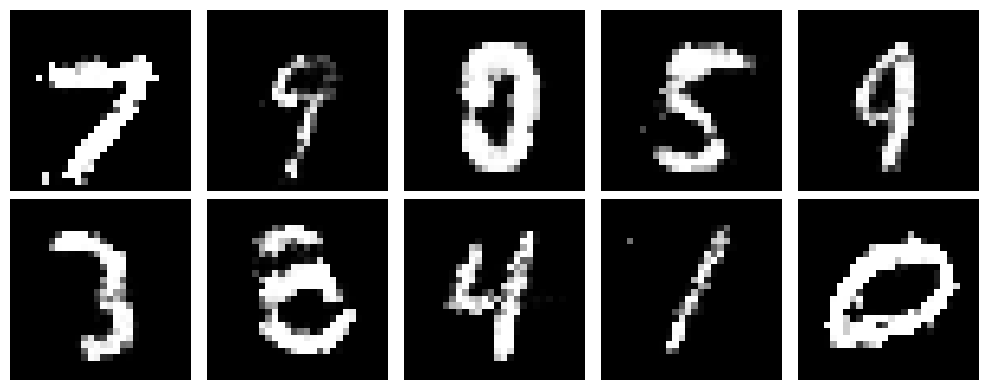

epoch: 84 loss generator: -1.5562 loss discriminator: -1.0994


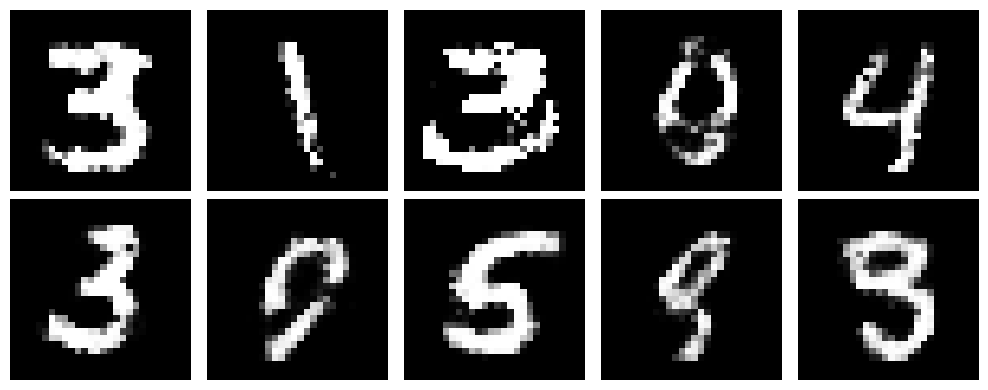

epoch: 85 loss generator: -1.5548 loss discriminator: -1.1011


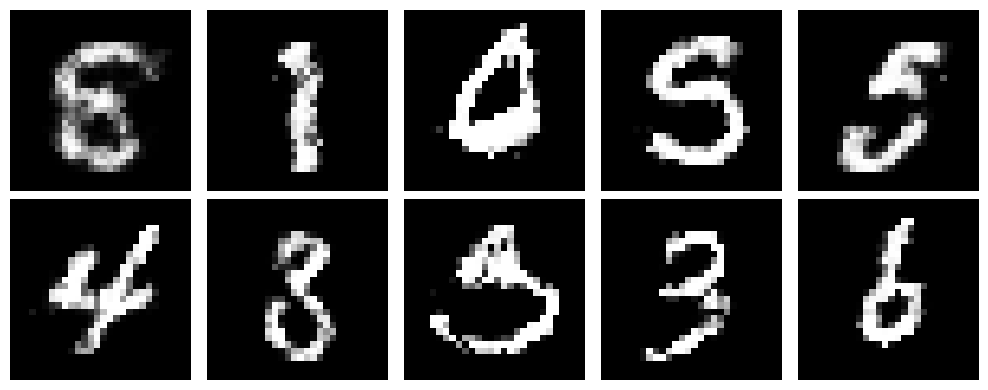

epoch: 86 loss generator: -1.5420 loss discriminator: -1.1033


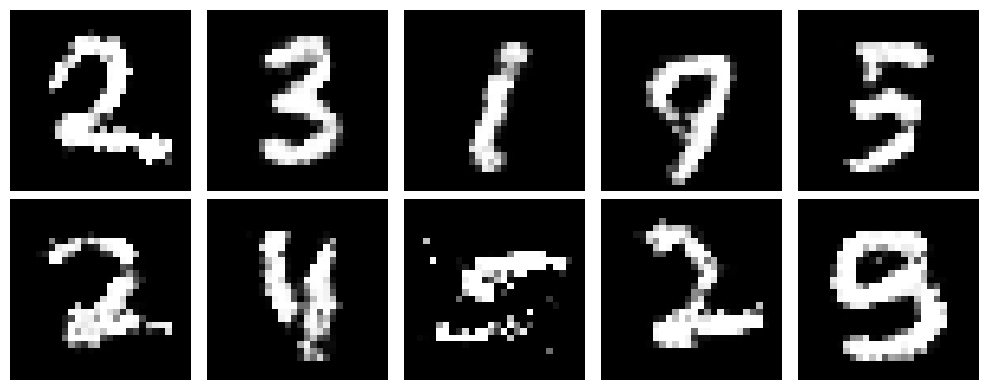

epoch: 87 loss generator: -1.5564 loss discriminator: -1.0996


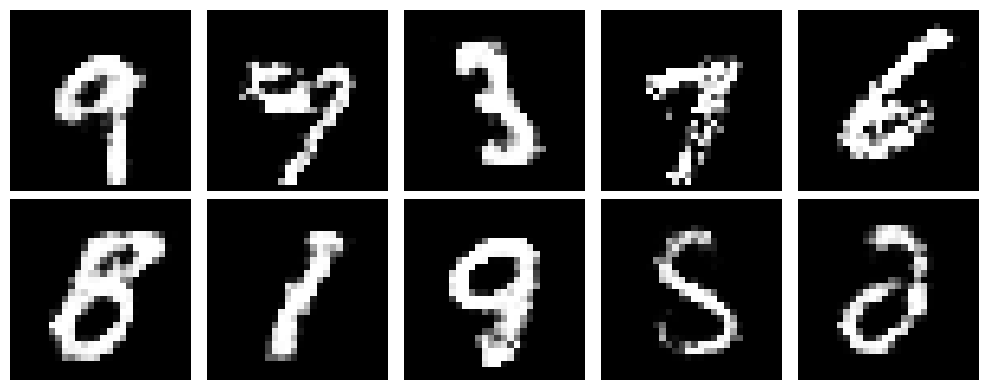

epoch: 88 loss generator: -1.5465 loss discriminator: -1.1062


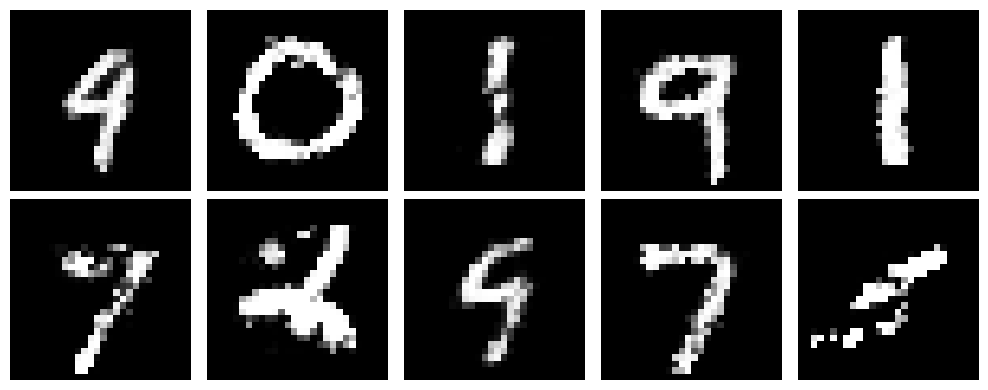

epoch: 89 loss generator: -1.5334 loss discriminator: -1.1093


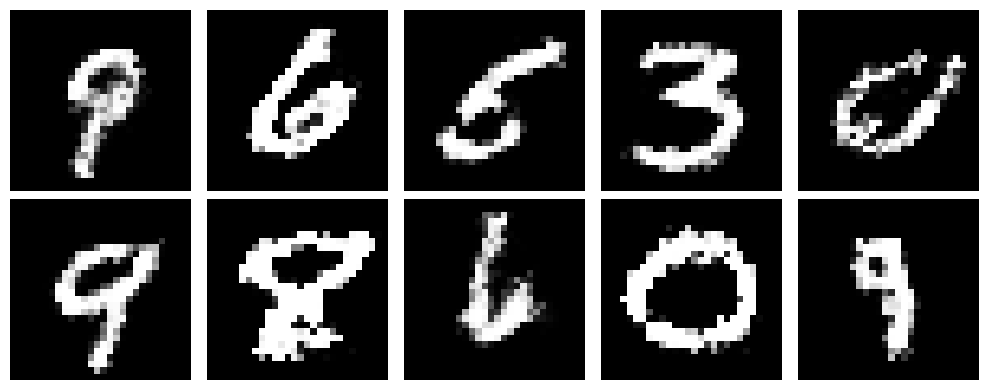

epoch: 90 loss generator: -1.5500 loss discriminator: -1.0968


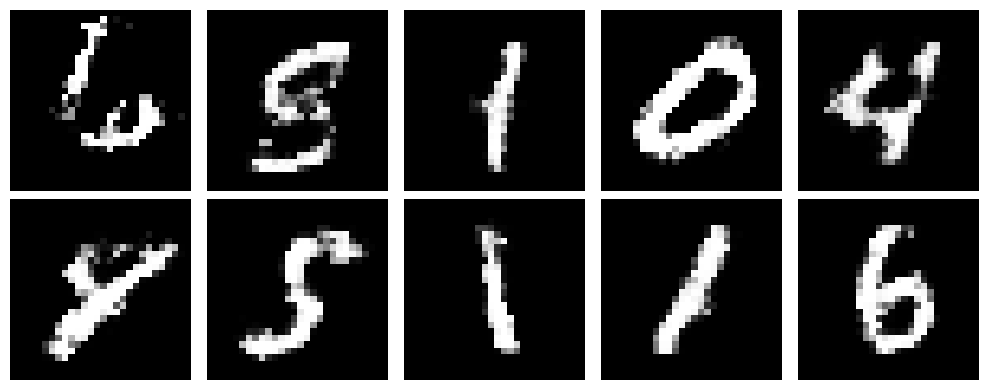

epoch: 91 loss generator: -1.5355 loss discriminator: -1.1019


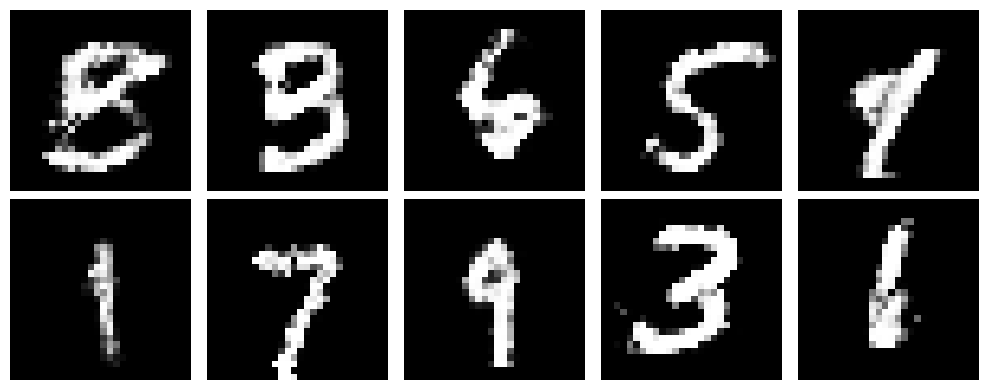

epoch: 92 loss generator: -1.5469 loss discriminator: -1.0995


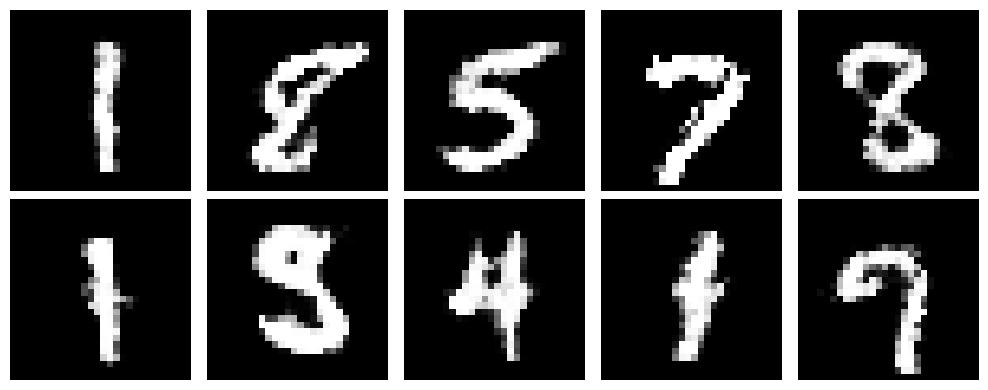

epoch: 93 loss generator: -1.5430 loss discriminator: -1.1048


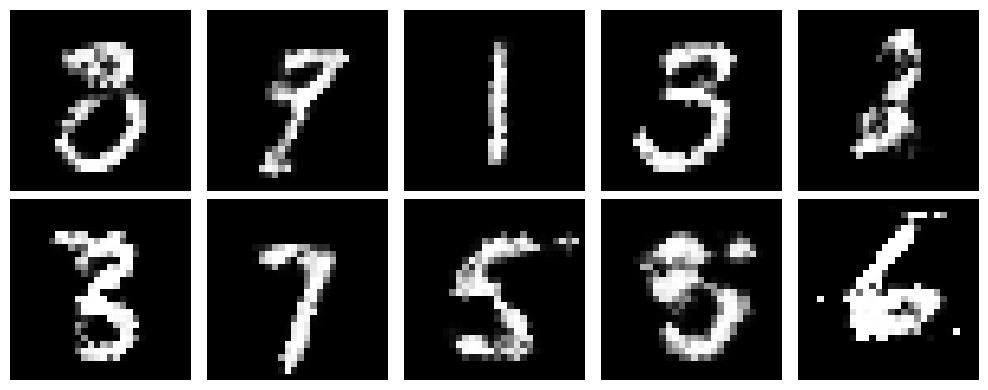

epoch: 94 loss generator: -1.5505 loss discriminator: -1.1017


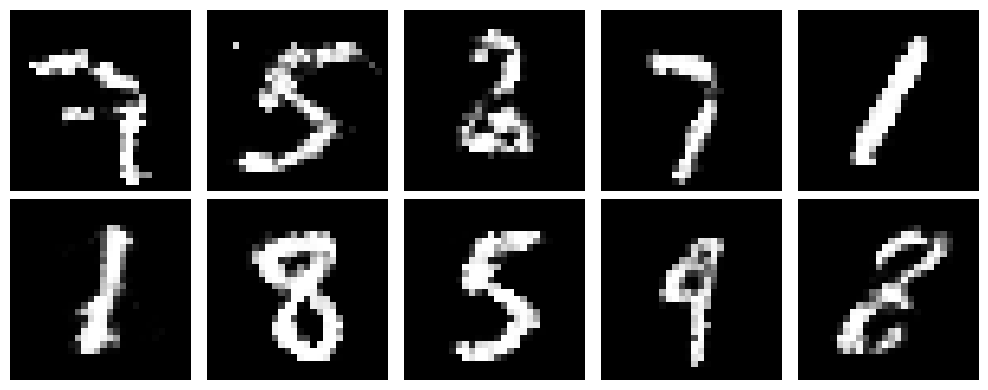

epoch: 95 loss generator: -1.5581 loss discriminator: -1.0992


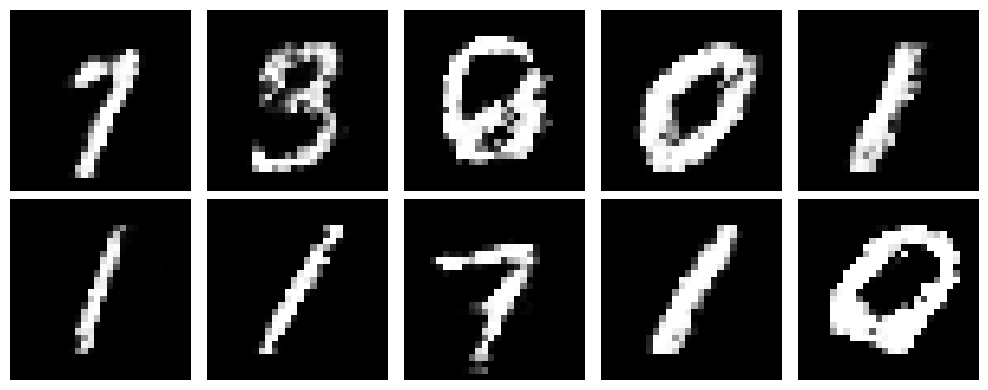

epoch: 96 loss generator: -1.5442 loss discriminator: -1.0981


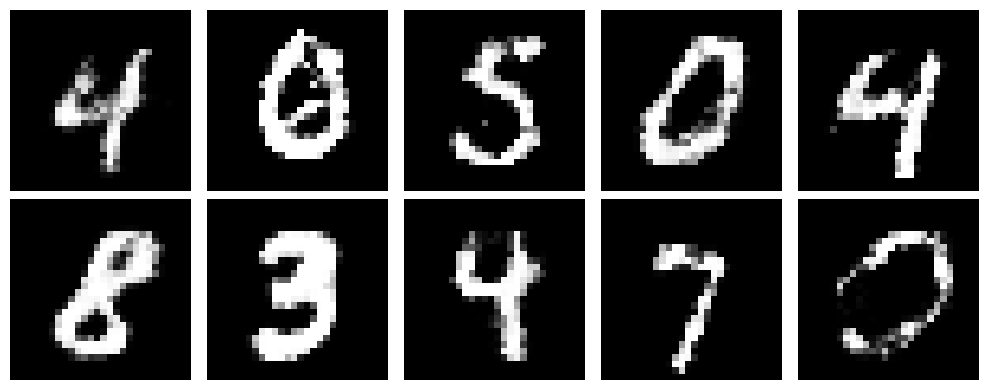

epoch: 97 loss generator: -1.5447 loss discriminator: -1.1060


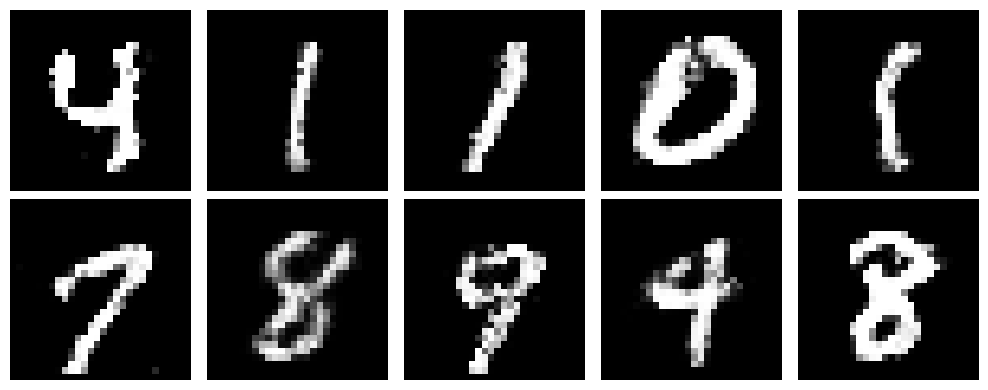

epoch: 98 loss generator: -1.5438 loss discriminator: -1.1041


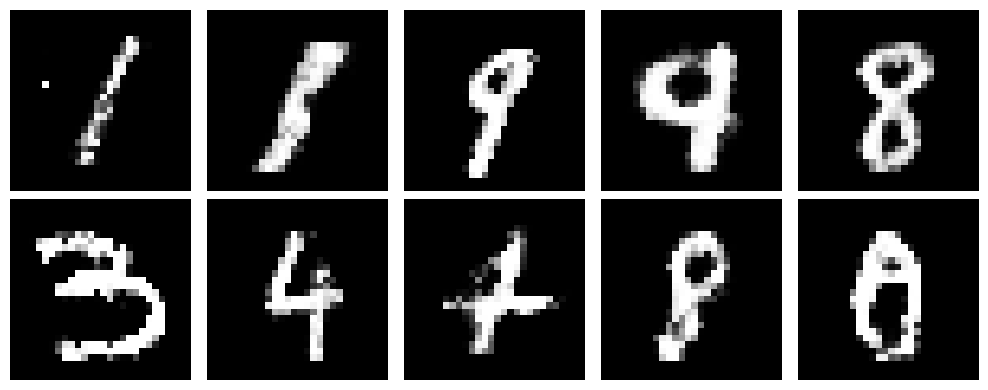

epoch: 99 loss generator: -1.5712 loss discriminator: -1.0985


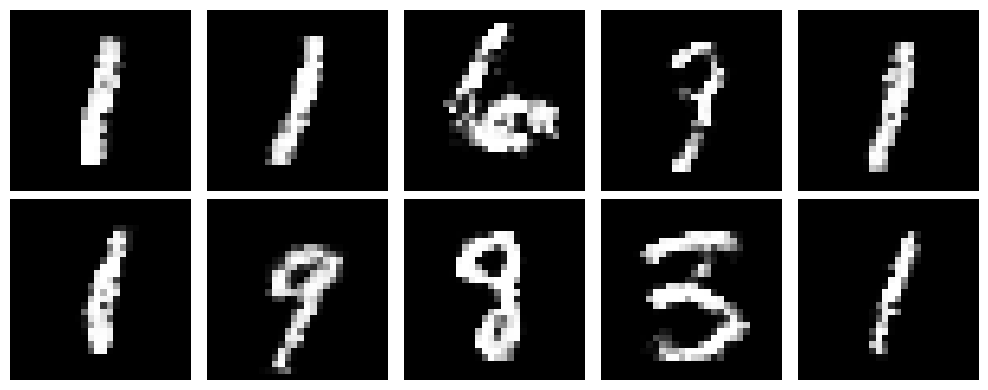

In [8]:
losses_D, losses_G = [], []
N = len(dataloader.dataset)
for epoch in range(epochs):

    total_loss_G, total_loss_D = 0.0, 0.0
    for x, _ in dataloader:
        # x is sampled from data generating distribution x ~ p_data
        x = x.to(device)

        # z is sampled from noise prior z ~ p_noise
        z = torch.distributions.uniform.Uniform(low=-1, high=1).sample([x.shape[0], 100]).to(device)
        D_x = D(x)
        D_G_z = D(G(z))

        # update descriminator by ascending its stochastic gradient
        optimizer_D.zero_grad()
        loss_d = criterion_D(D_x, D_G_z)
        loss_d.backward()
        optimizer_D.step()
        
        # z is sampled from noise prior
        # z ~ p_noise
        z = torch.distributions.uniform.Uniform(low=-1, high=1).sample([x.shape[0], 100]).to(device)
        D_G_z = D(G(z))

        # update generator by descending its stochastic gradient
        optimizer_G.zero_grad()
        loss_g = criterion_G(D_G_z)
        loss_g.backward()
        optimizer_G.step()

        total_loss_D += loss_d.item() * x.shape[0]
        total_loss_G += loss_g.item() * z.shape[0]
    losses_D.append(total_loss_D / N)
    losses_G.append(total_loss_G / N)

    if verbose: 
        print(f'epoch: {epoch} loss generator: {(total_loss_G/N):.4f} loss discriminator: {(total_loss_D/N):.4f}')

    # short visualization, to see, if it works :D
    save_plot(G, Z_noise, nrows_1, ncols_1, figsize_1, epoch) 
    
    fig, ax = plt.subplots(nrows_2, ncols_2, figsize=figsize_2)  
    # fig.subplots_adjust(wspace=0, hspace=0)
    ax = ax.flatten() 
    for i in range(nrows_2 * ncols_2):
        z = torch.distributions.uniform.Uniform(low=-1, high=1).sample([1, 100]).to(device)
        G_z = G(z)
        img = G_z.reshape(28, 28).detach().cpu().numpy()
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
    plt.tight_layout() 
    plt.show(fig) 

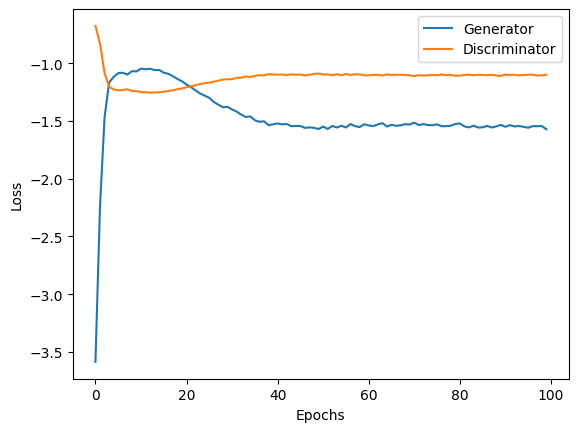

In [9]:
x = np.arange(len(losses_G))

_, ax = plt.subplots()
ax.plot(x, losses_G, label='Generator')
ax.plot(x, losses_D, label='Discriminator')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()